12/11/2021

Rebin HST UV spectra from Sulentic+2007 and combine with their SDSS optical data where available.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from os.path import exists

import sys
#sys.path.append("/Volumes/MyPassportforMac/HST/AllHSTCode/")
sys.path.append("../../AllHSTCode/")
import Read_FOS_TVM
import Read_STIS_TVM
import Read_COS_TVM

In [2]:
def isNaN(string):
    return string != string

In [3]:
!ls ../../AllData/SulenticAllData

COS                                   Sulentic2007Info.fit
FOS                                   Sulentic2007Info_wpaths.csv
FinalPlots                            Sulentic2007Info_wpaths.csv .csv
Final_rebinned_tvm                    Sulentic2007Tables1_2.classicalRM.fit
OtherOpt                              Sulentic2007Tables1_2.fit
SDSS                                  notes_sulentic_tvm.txt
STIS                                  speclist_sdss_sulentic07.txt
Sulentic2007Info.csv                  sulentic_targets.ipynb


In [4]:
sul = pd.read_csv("../../AllData/SulenticAllData/Sulentic2007Info_wpaths.csv")
sul

IAU Instrument     FOS_Name    STIS_Name COS_Name     HST_Opt  \
0    J12291+0203   FOS+STIS        3C273         None     None  STIS/3C273   
1    J18421+7946   FOS+STIS        3C390         None     None  STIS/3C390   
2    J14275+2632   FOS+STIS  J14275+2632    B21425+26     None         NaN   
3    J01376-2430       STIS         None  J01376-2430     None         NaN   
4    J04232-0120   FOS+STIS  J04232-0120  J04232-0120     None         NaN   
..           ...        ...          ...          ...      ...         ...   
125  J01399+0131        FOS        UM355         None     None         NaN   
126  J13532+6345       STIS         None   PG1351+640     None         NaN   
127  J17046+6044   FOS+STIS  SBS1704+608  SBS1704+608     None         NaN   
128  J00573-2222       STIS         None      TONS180     None         NaN   
129  J22426+2943   FOS+STIS     UGC12163     UGC12163     None        STIS   

    Inst_final S2N_coadd       z  Hbeta  ...         _RA        _DE  \
0          FOS       219  0.1583   3829  ...  187.277896   2.052406   
1          FOS        26  0.0555  12688  ...  280.537458  79.771424   
2          FOS        17  0.3634   9224  ...  216.898334  26.537402   
3         STIS        19  0.8350  10563  ...   24.409853 -24.514971   
4          FOS        17  0.9150   3185  ...   65.815836  -1.342518   
..         ...       ...     ...    ...  ...         ...        ...   
125        FOS      5.8*  0.2600  11245  ...   24.988842   1.529492   
126       STIS        19  0.0882   5876  ...  208.315980  63.762694   
127        FOS        22  0.3720   9224  ...  256.172372  60.741814   
128       STIS        26  0.0620   1131  ...   14.334174 -22.382344   
129        FOS      108*  0.0245   1300  ...  340.663788  29.725431   

     SDSS Spectra           SDSS_NAME          RA        DEC   PLATE      MJD  \
0             yes                 NaN         NaN        NaN     NaN      NaN   
1             yes                 NaN         NaN        NaN     NaN      NaN   
2             yes  142735.60+263214.5  216.898360  26.537377  2135.0  53827.0   
3             yes                 NaN         NaN        NaN     NaN      NaN   
4             yes                 NaN         NaN        NaN     NaN      NaN   
..            ...                 ...         ...        ...     ...      ...   
125            no                 NaN         NaN        NaN     NaN      NaN   
126           yes                 NaN         NaN        NaN     NaN      NaN   
127           yes  170441.38+604430.5  256.172426  60.741806   353.0  51703.0   
128           yes                 NaN         NaN        NaN     NaN      NaN   
129           yes                 NaN         NaN        NaN     NaN      NaN   

     FIBERID  Separation  
0        NaN         NaN  
1        NaN         NaN  
2      340.0    0.121078  
3        NaN         NaN  
4        NaN         NaN  
..       ...         ...  
125      NaN         NaN  
126      NaN         NaN  
127    377.0    0.099728  
128      NaN         NaN  
129      NaN         NaN  

[130 rows x 31 columns]

In [5]:
z       = sul["z"].values
sdss    = ~isNaN(sul["SDSS_NAME"].values)
plate   = sul["PLATE"].values
mjd     = sul["MJD"].values
fiber   = sul["FIBERID"].values
id_fos  = sul["FOS_Name"].values
id_stis = sul["STIS_Name"].values
id_cos = sul["COS_Name"].values

In [6]:
FOS  = sul["FOS_Name"].values!="None"
STIS = sul["STIS_Name"].values!="None"
COS  = sul["COS_Name"].values!="None"
(FOS&sdss).sum(), (STIS&sdss).sum(), (COS&sdss).sum(), ((FOS|STIS|COS)&sdss).sum()

(52, 3, 0, 53)

In [7]:
id_cos[(COS&sdss)]

array([], dtype=object)

There is one Sulentic source that only has COS data.  Will worry about that as I collect more DR16 sources for the full sample.

For now the sample I'll work with is those with either FOS or STIS data, and which have SDSS-DR16 data as well.  This gives 53 Sulentic quasars.

In [8]:
#Check if we have NecessaryParams.csv file saved for each 
N = 0
for i in range(sul[FOS].shape[0]):
    if not exists("/Volumes/MyPassportforMac/HST/AllData/SulenticAllData/FOS/%s/NecessaryParams.csv" % id_fos[FOS][i]):
        N += 1
        print("Missing HST Observational Params for %s" % id_fos[FOS][i])
    #Read_FOS_TVM.rebin(id_fos[FOS][i], "%04d/spec-%04d-%05d-%04d.fits"%(plate[FOS][i],mjd[FOS][i],fiber[FOS][i]), z[FOS][i])
    
    
N

Missing HST Observational Params for 3C273
Missing HST Observational Params for 3C390
Missing HST Observational Params for J14275+2632
Missing HST Observational Params for J04232-0120
Missing HST Observational Params for J21148+0607
Missing HST Observational Params for J21377-1432
Missing HST Observational Params for J22541+1136
Missing HST Observational Params for 3C057
Missing HST Observational Params for 3C095
Missing HST Observational Params for 3C110
Missing HST Observational Params for 3C207
Missing HST Observational Params for 3C215
Missing HST Observational Params for 3C232
Missing HST Observational Params for 3C254
Missing HST Observational Params for 3C263
Missing HST Observational Params for 3C281
Missing HST Observational Params for 3C334
Missing HST Observational Params for 3C336
Missing HST Observational Params for 3C345
Missing HST Observational Params for 3C454
Missing HST Observational Params for Ark120
Missing HST Observational Params for Fairall9
Missing HST Observat

117

Good, should be ready to test all FOS-Sulentic spectra.  Now same thing for STIS and COS.

In [9]:
#Check if we have NecessaryParams.csv file saved for each 
N = 0
for i in range(sul[STIS].shape[0]):
    if not exists("/Volumes/MyPassportforMac/HST/AllData/SulenticAllData/STIS/%s/NecessaryParams.csv" % id_stis[STIS][i]):
        N += 1
        print("Missing HST Observational Params for %s" % id_stis[STIS][i])
    #Read_STIS_TVM.rebin(id_stis[STIS][i], "%04d/spec-%04d-%05d-%04d.fits"%(plate[STIS][i],mjd[STIS][i],fiber[STIS][i]), z[STIS][i])
    
    
N

Missing HST Observational Params for B21425+26
Missing HST Observational Params for J01376-2430
Missing HST Observational Params for J04232-0120
Missing HST Observational Params for J07086-4933
Missing HST Observational Params for J13122+3515
Missing HST Observational Params for J13253-3824
Missing HST Observational Params for J15591+3501
Missing HST Observational Params for J21148+0607
Missing HST Observational Params for J21377-1432
Missing HST Observational Params for J22541+1136
Missing HST Observational Params for Mrk509
Missing HST Observational Params for NGC3227
Missing HST Observational Params for NGC3516
Missing HST Observational Params for NGC4253
Missing HST Observational Params for NGC4395
Missing HST Observational Params for PG1351+640
Missing HST Observational Params for SBS1704+608
Missing HST Observational Params for TONS180
Missing HST Observational Params for UGC12163


19

Finally.  Now the COS sources.  Should be able to use the ``all_exposures.txt`` files, but I'm not sure where they came from, so it would be tricky to fill in for those that don't have.

In [10]:
#Check if we have NecessaryParams.csv file saved for each 
N = 0
for i in range(sul[COS].shape[0]):
    if not exists("/Volumes/MyPassportforMac/HST/AllData/SulenticAllData/COS/%s/all_exposures.txt" % id_cos[COS][i]):
        N += 1
        print("Missing HST Observational Params for %s" % id_cos[COS][i])
    #Read_COS_TVM.rebin(id_cos[COS][i], "%04d/spec-%04d-%05d-%04d.fits"%(plate[COS][i],mjd[COS][i],fiber[COS][i]), z[COS][i])
    
    
N

Missing HST Observational Params for J00535+1241
Missing HST Observational Params for J16279+5522
Missing HST Observational Params for MR2251-178


3

In [11]:
sdss

array([False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False,  True,  True,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True, False,
        True,  True,  True,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/LowerResHSTRebin_TVM.py:102: RuntimeWarning: invalid value encountered in sqrt
  fluxerr_HST_rebin[i] = (m_err*wave_HST_rebin[i] + b_err) * np.sqrt(old_width/new_width)
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 219.526006


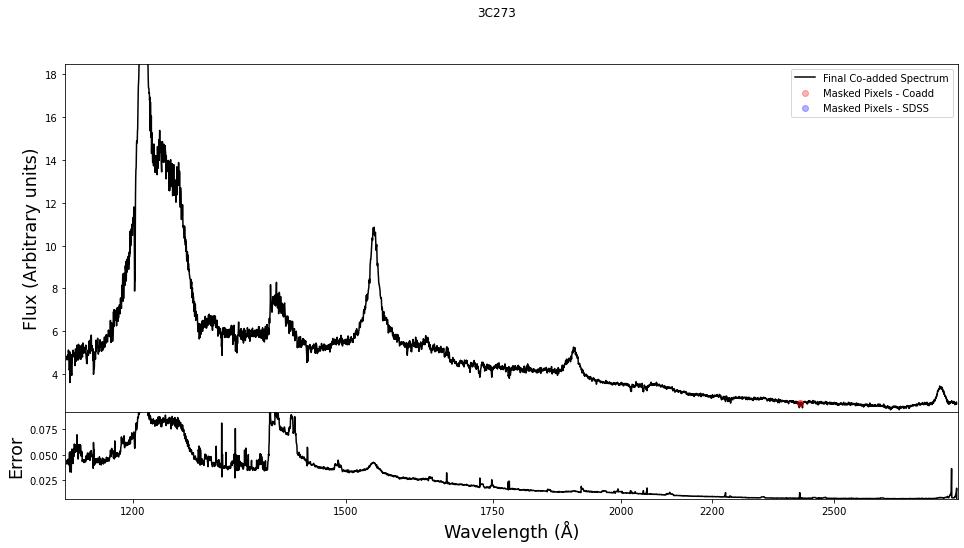

Good: 3C273


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 25.671471


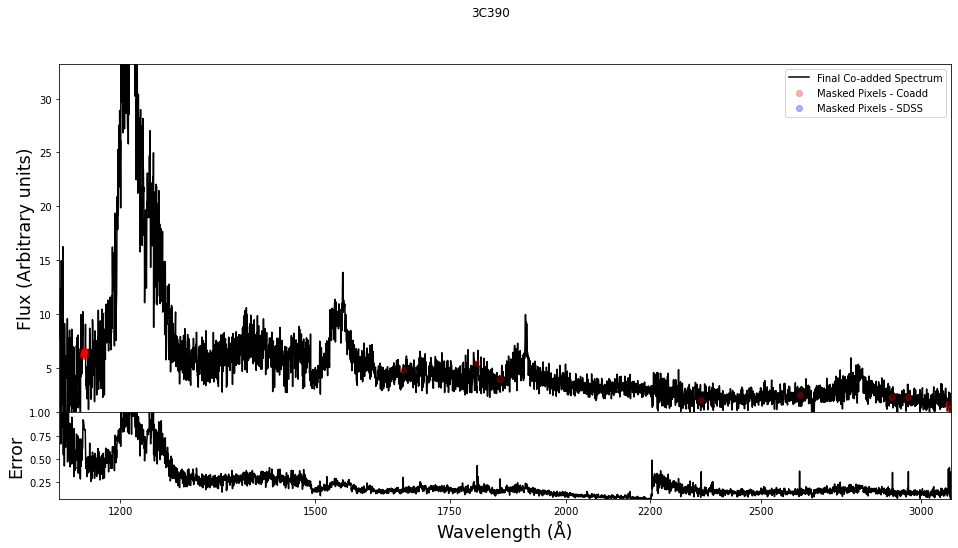

Good: 3C390
Median wavelength resolution: 69.09 km/s
SNR is 16.672894


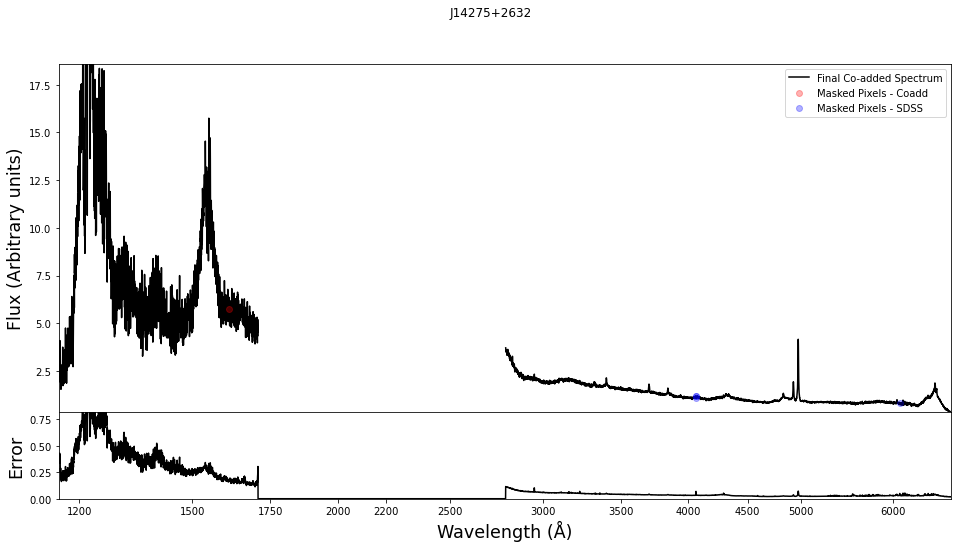

Good: J14275+2632
Median wavelength resolution: 69.09 km/s
SNR is 17.084958


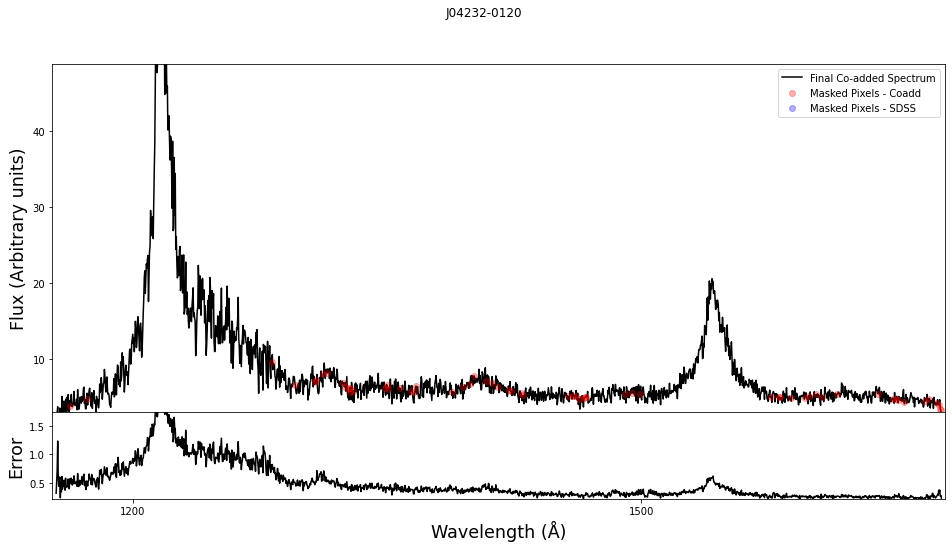

Good: J04232-0120


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 24.104890


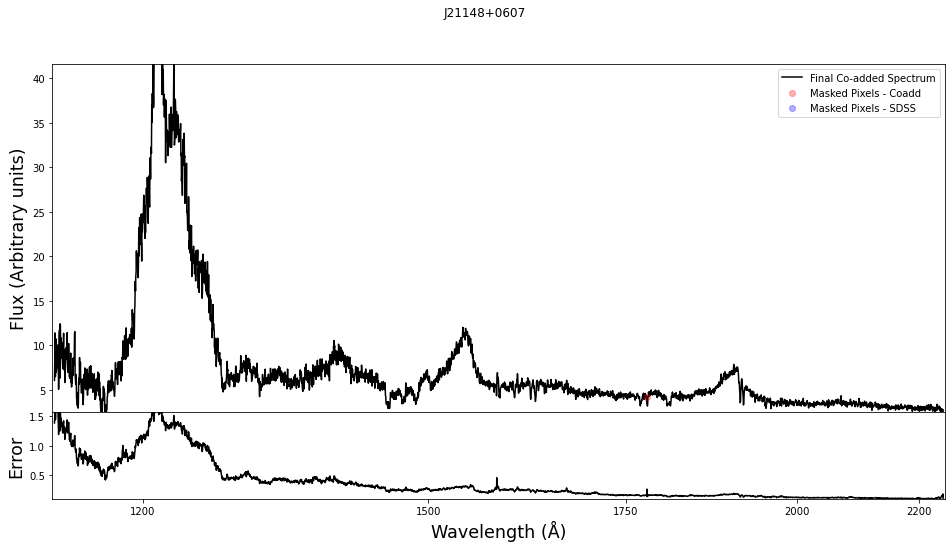

Good: J21148+0607


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 9.966455


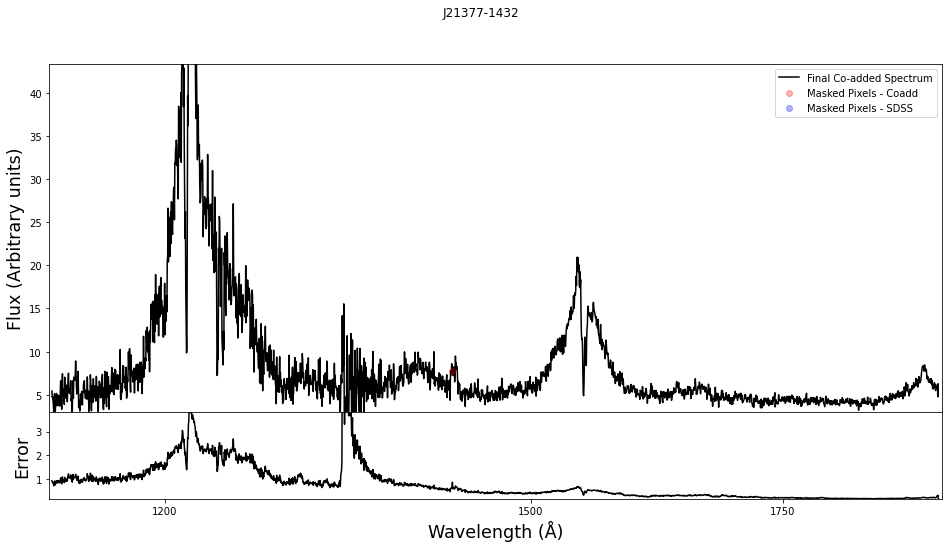

Good: J21377-1432


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 54.761428


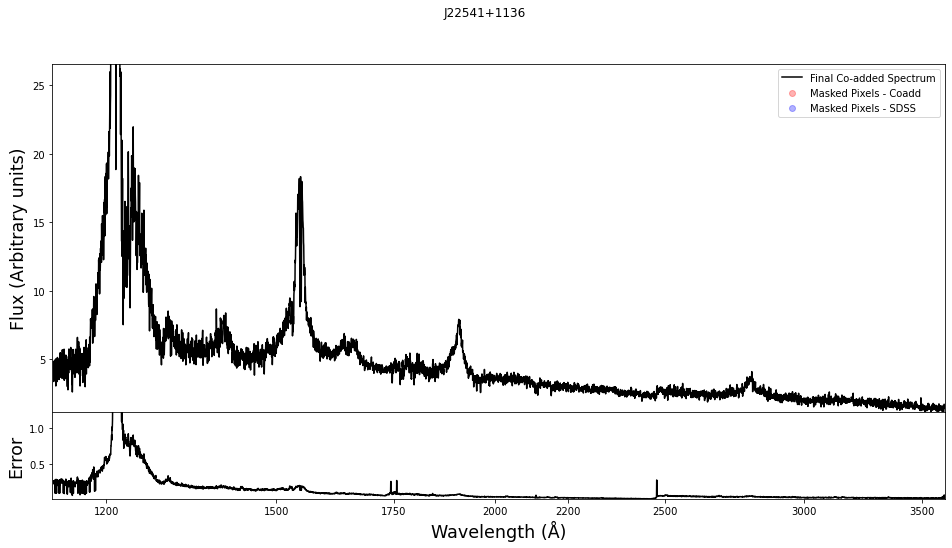

Good: J22541+1136


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_FOS_TVM.py:486: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 99.752237


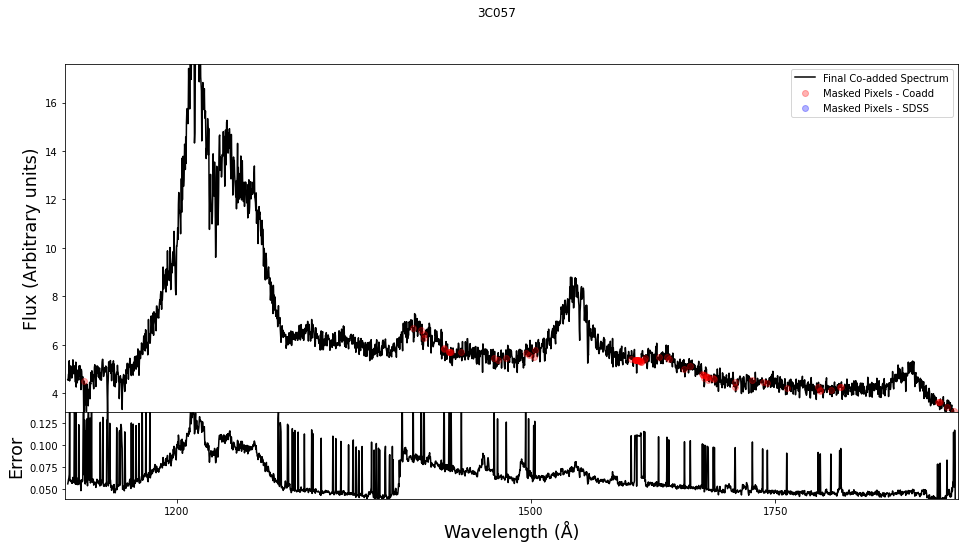

Good: 3C057
Median wavelength resolution: 69.09 km/s
SNR is 18.477630


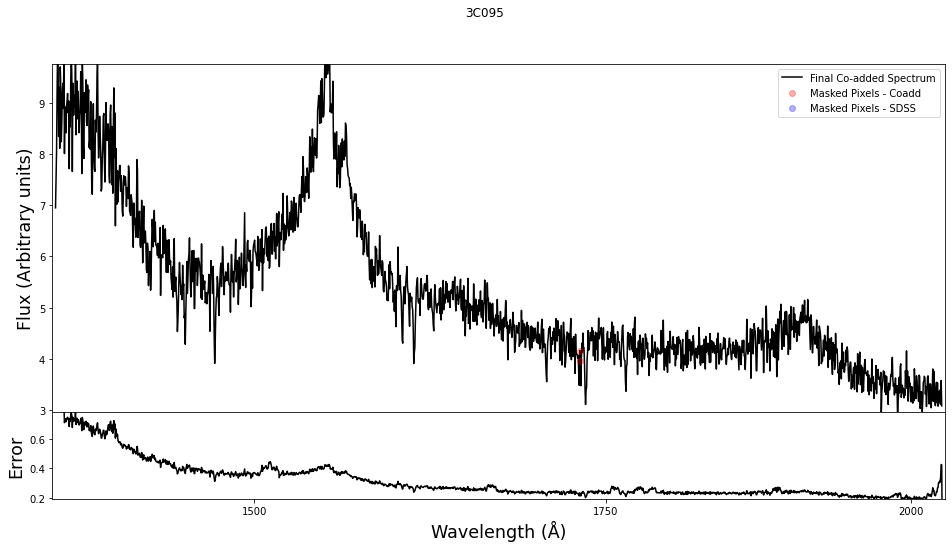

Good: 3C095


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 67.724108


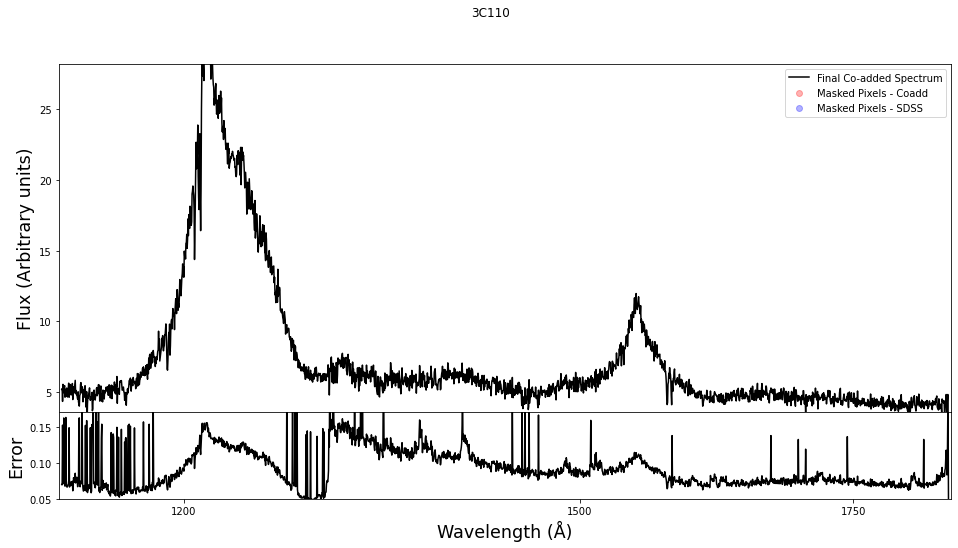

Good: 3C110


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 23.759741


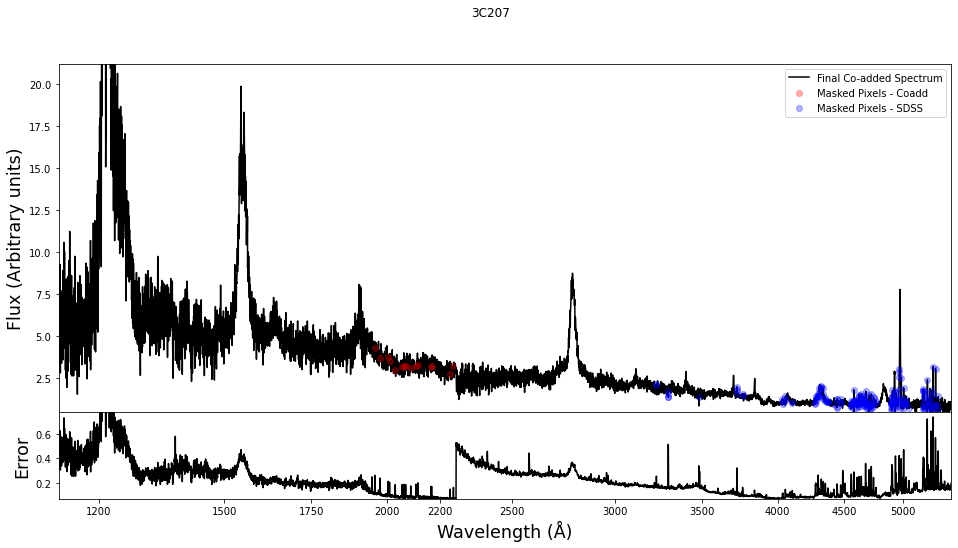

Good: 3C207


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 21.476499


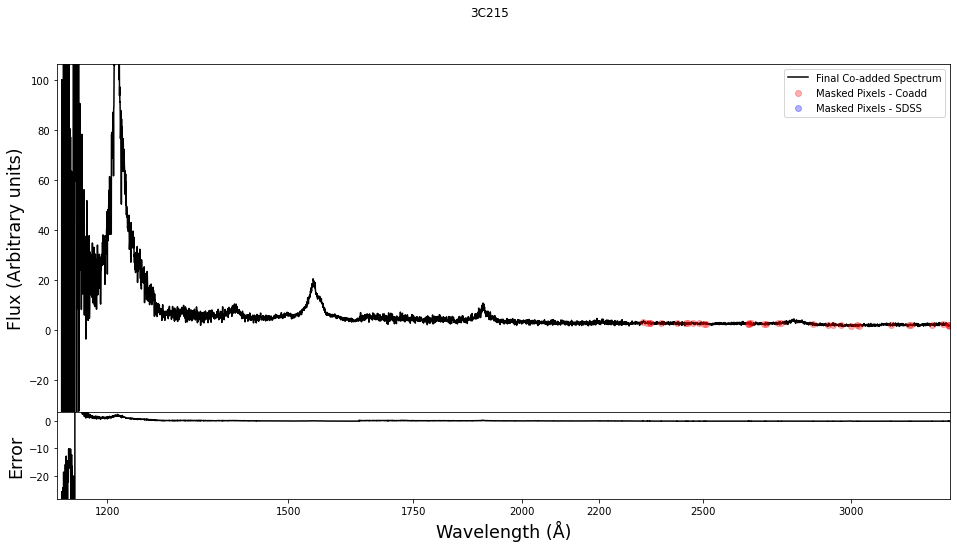

Good: 3C215


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 22.910767


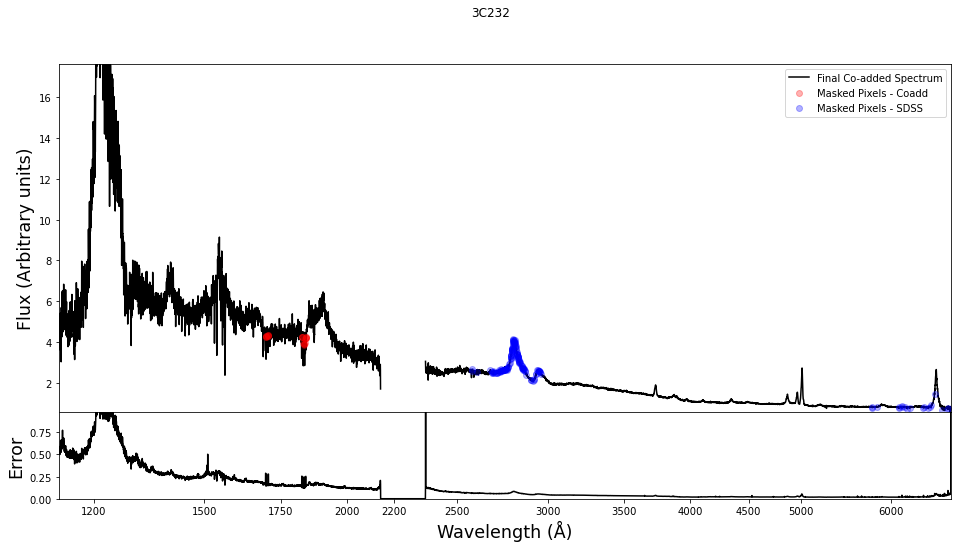

Good: 3C232


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 35.646445


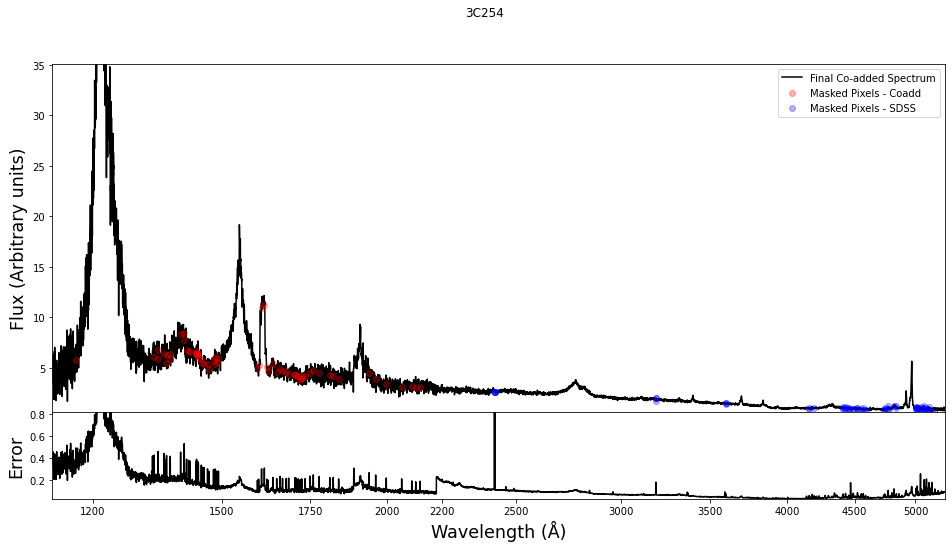

Good: 3C254


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 30.075193


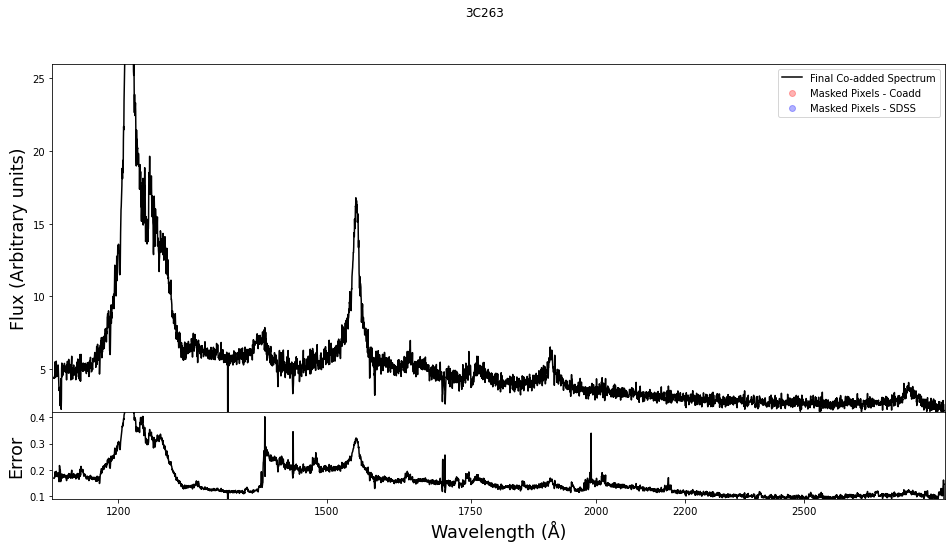

Good: 3C263


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 20.237292


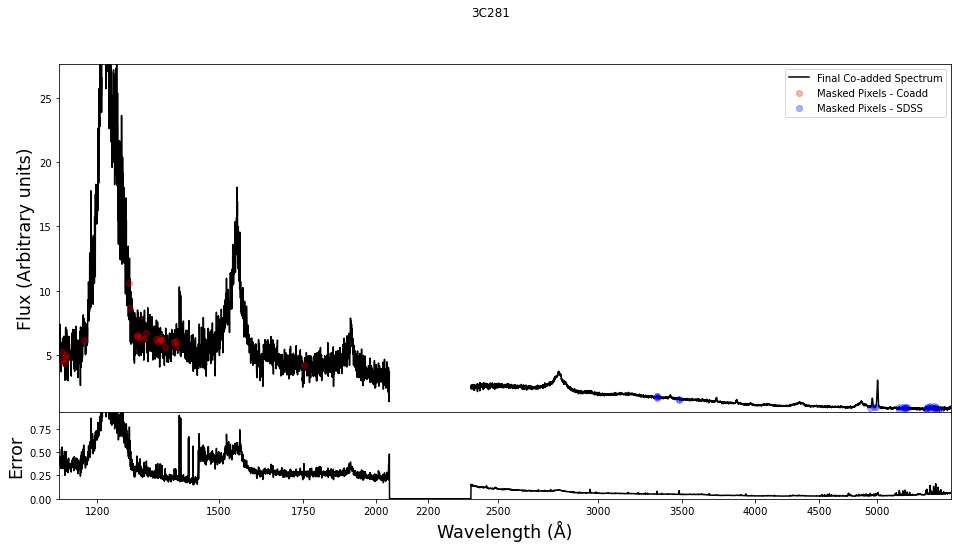

Good: 3C281


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_FOS_TVM.py:486: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 44.395867


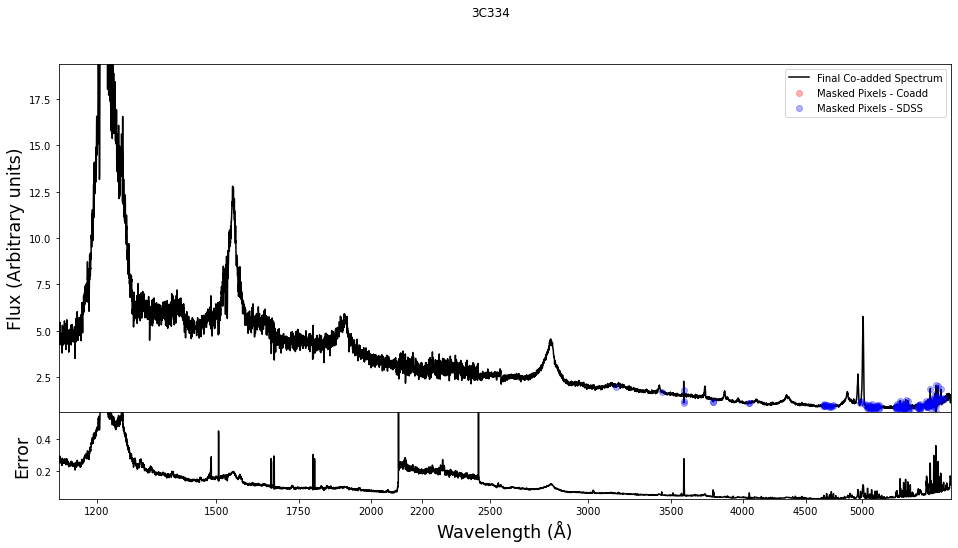

Good: 3C334


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 35.849191


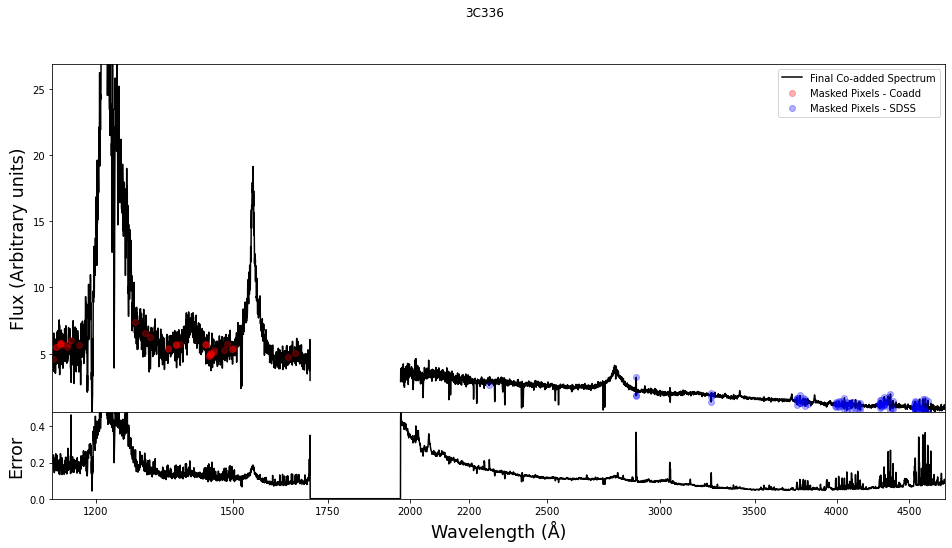

Good: 3C336


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 10.106972


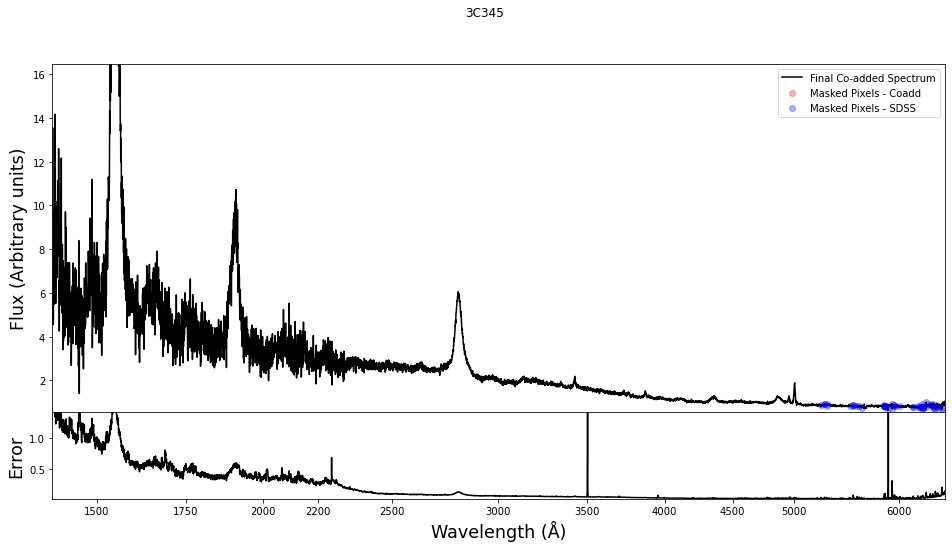

Good: 3C345
Median wavelength resolution: 69.09 km/s
SNR is 21.156194


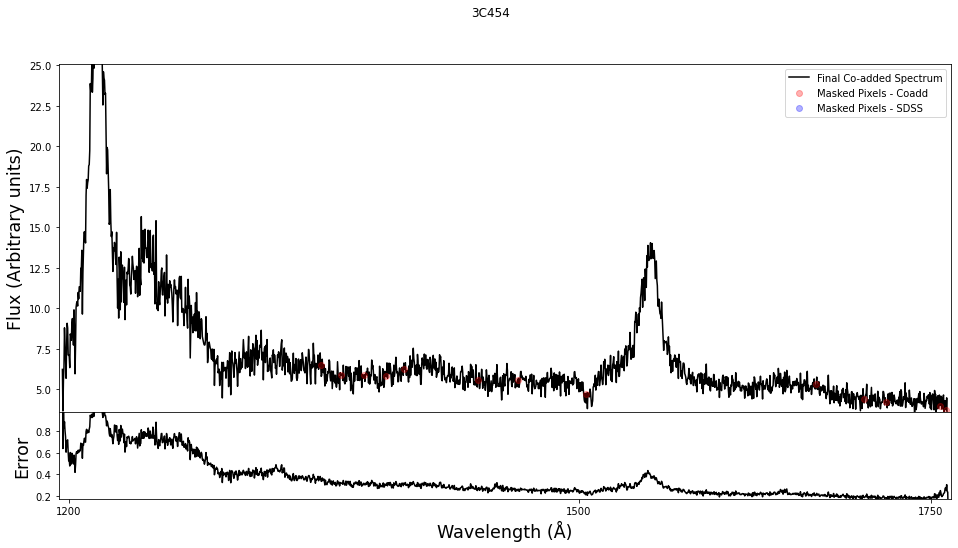

Good: 3C454


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 25.743066


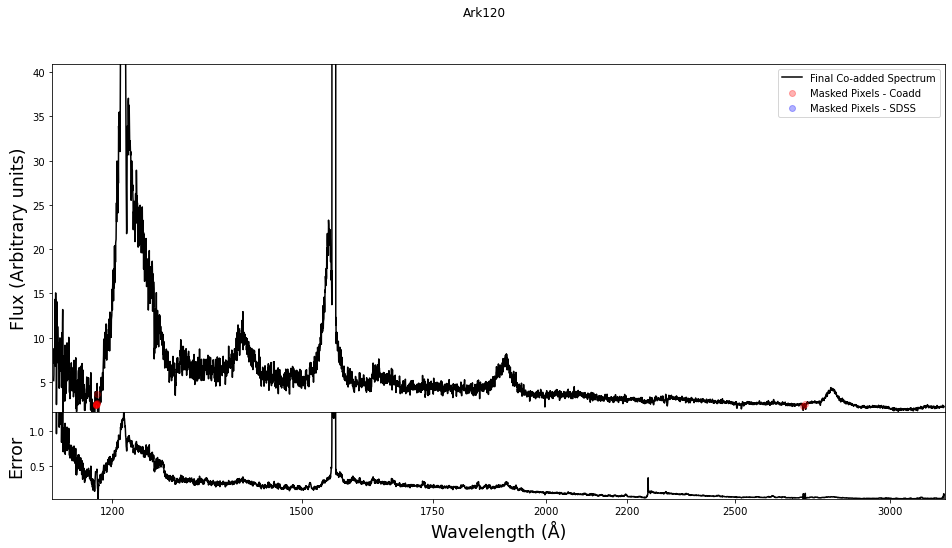

Good: Ark120


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 23.756239


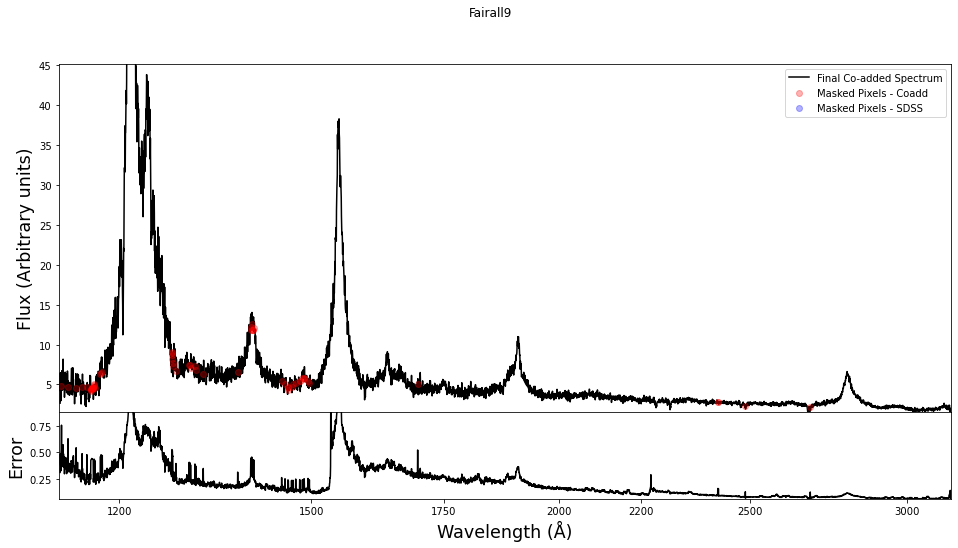

Good: Fairall9


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 23.254691


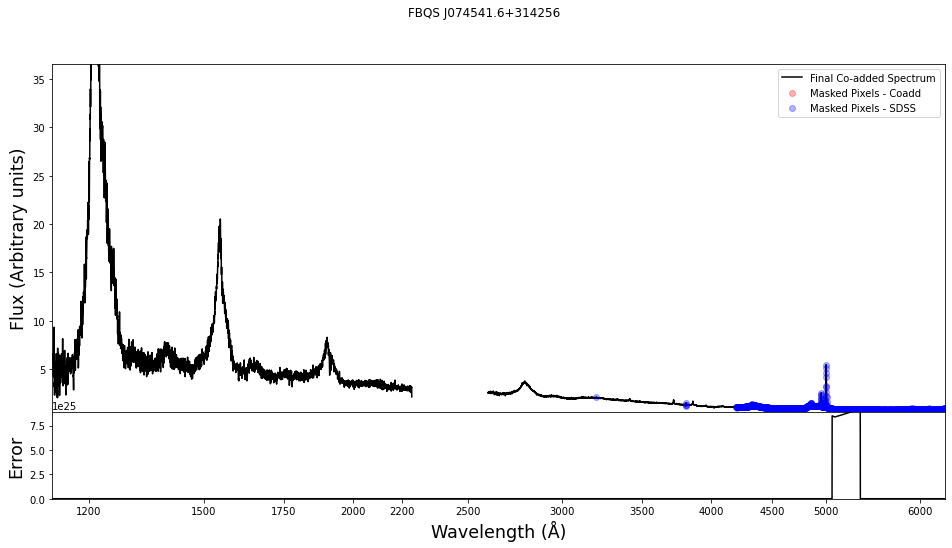

Good: FBQS J074541.6+314256


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 101.577219


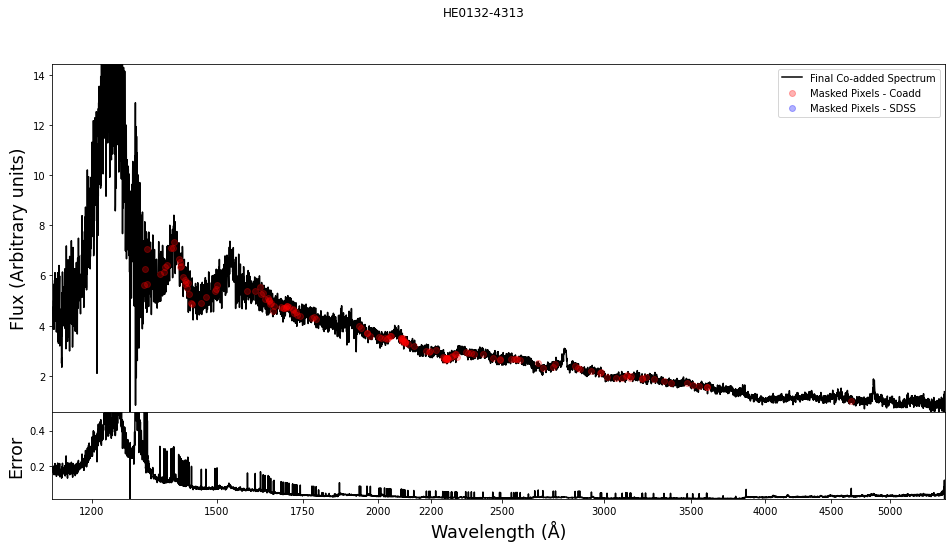

Good: HE0132-4313


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 16.720358


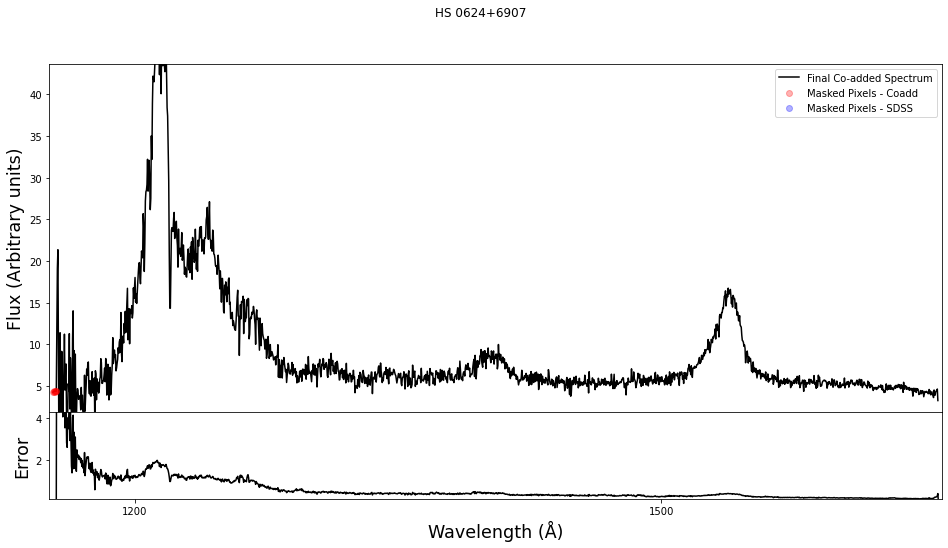

Good: HS 0624+6907
Median wavelength resolution: 69.09 km/s
SNR is 31.795703


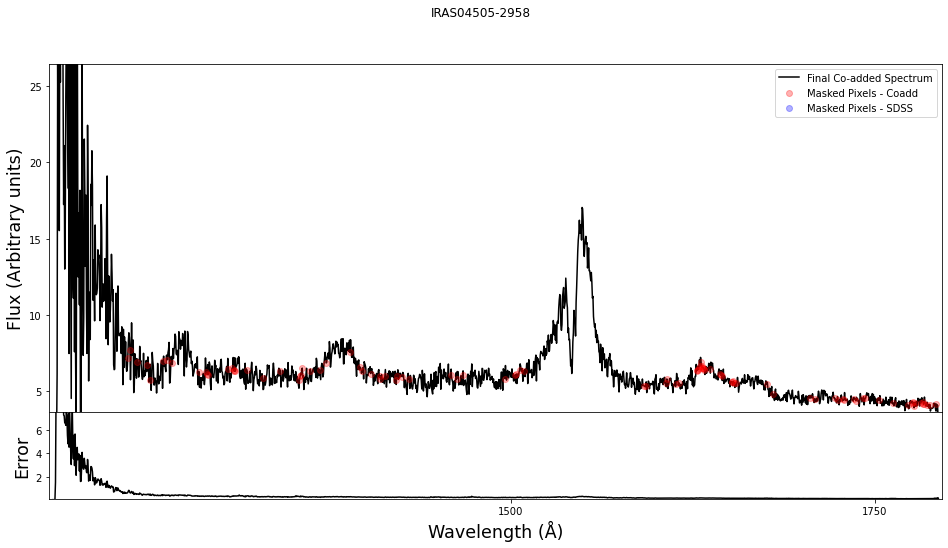

Good: IRAS04505-2958


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 78.982392


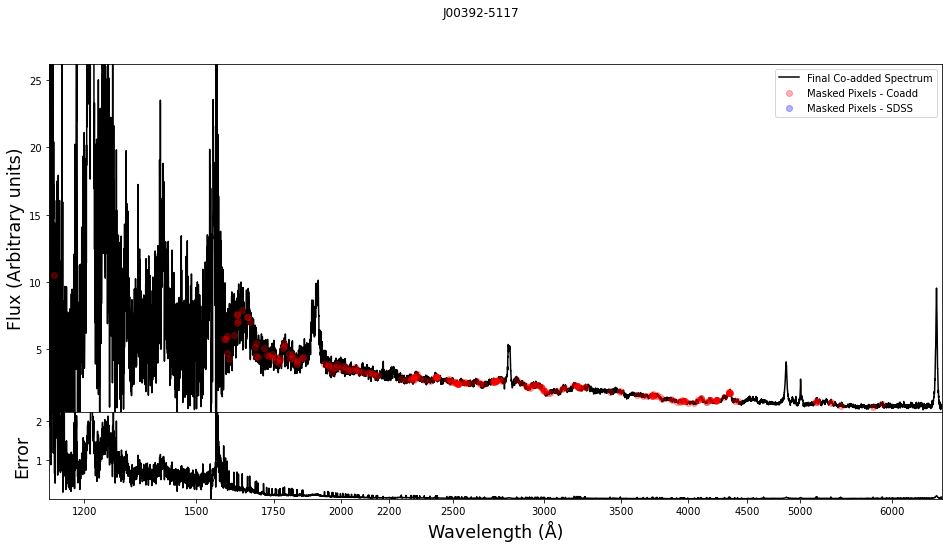

Good: J00392-5117


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 11.373251


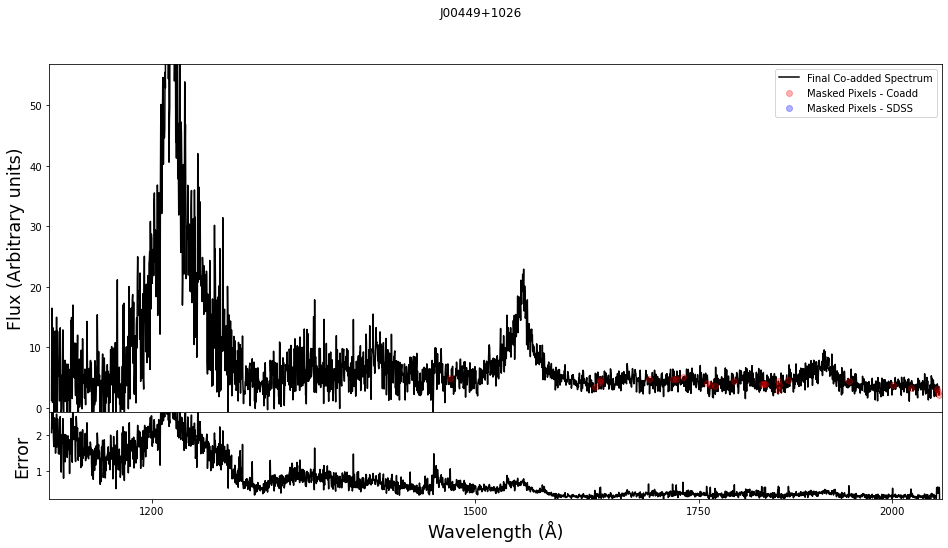

Good: J00449+1026


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 51.084634


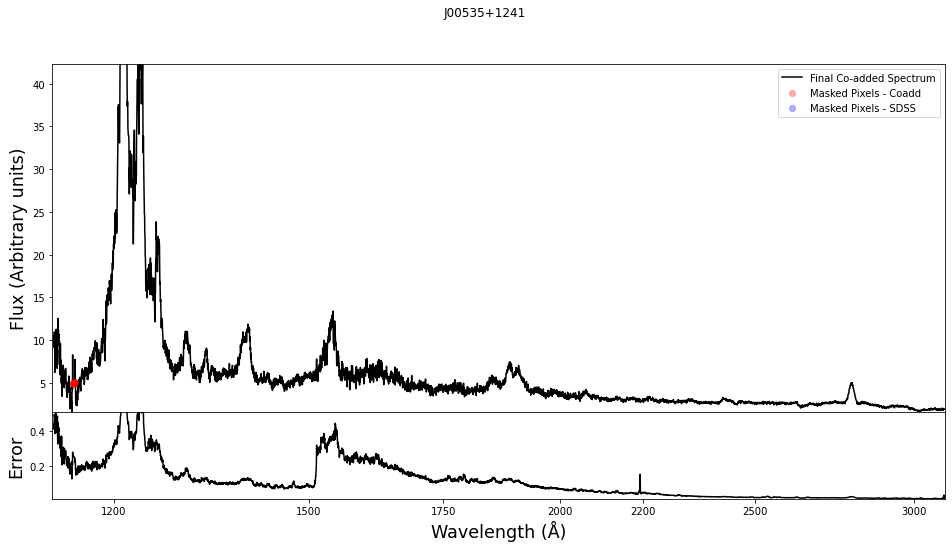

Good: J00535+1241
Median wavelength resolution: 69.09 km/s
Coadd for J02171+1104 is not viable.
SNR is 5.607588


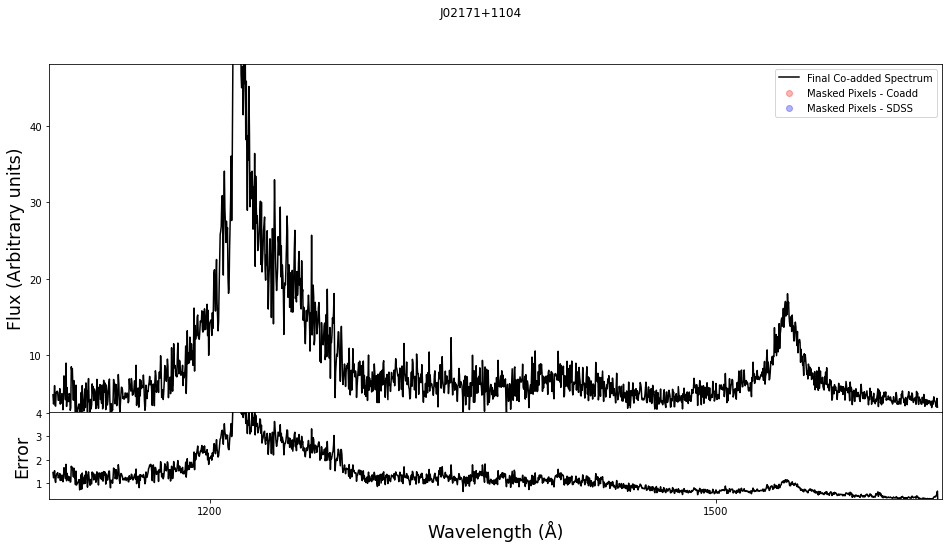

Good: J02171+1104


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 25.314995


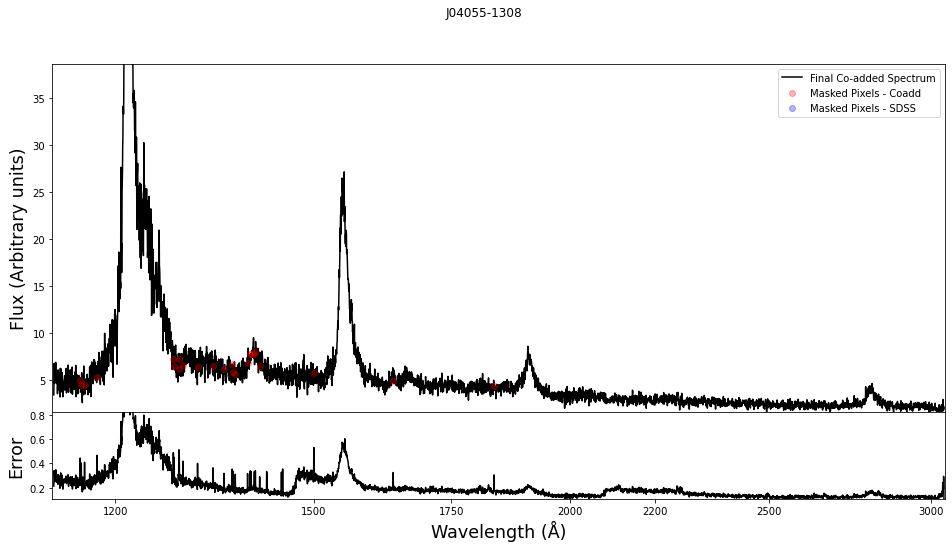

Good: J04055-1308


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 31.774668


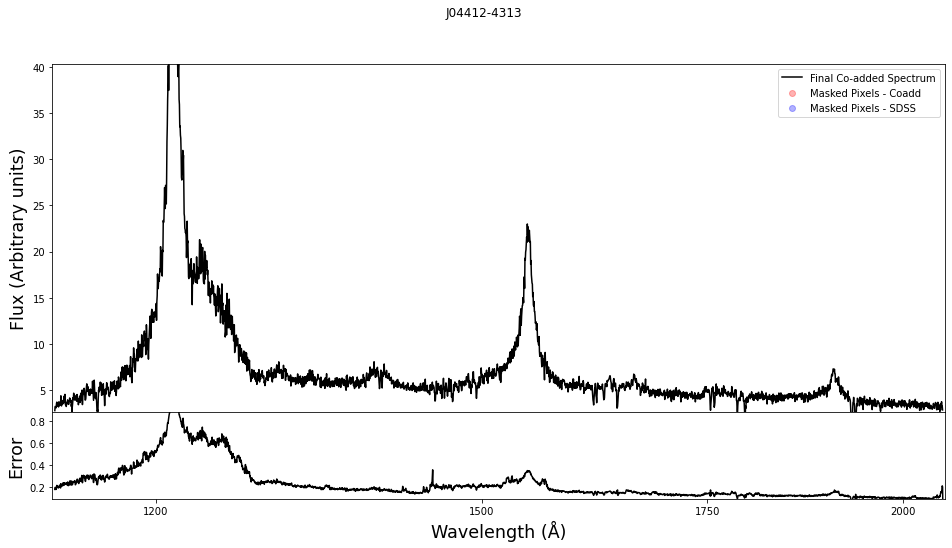

Good: J04412-4313


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 90.847578


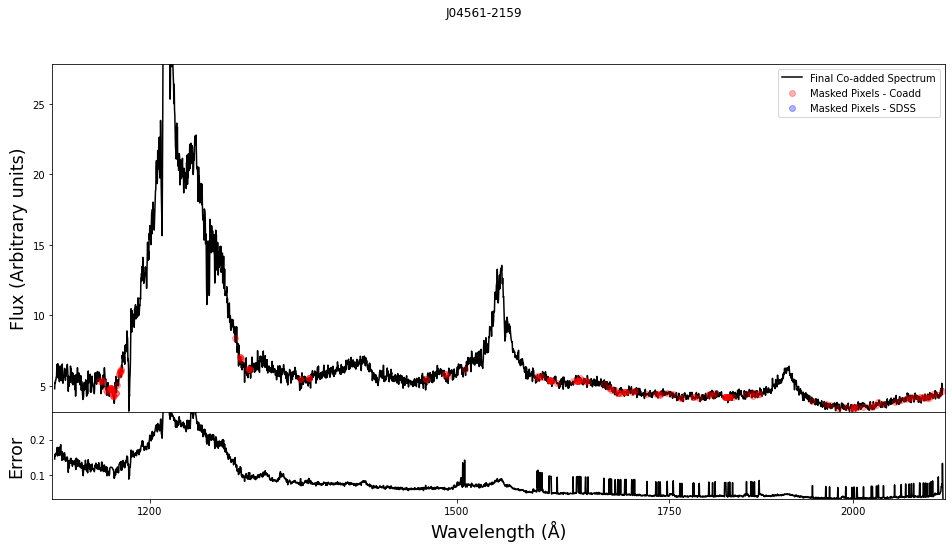

Good: J04561-2159


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 19.920510


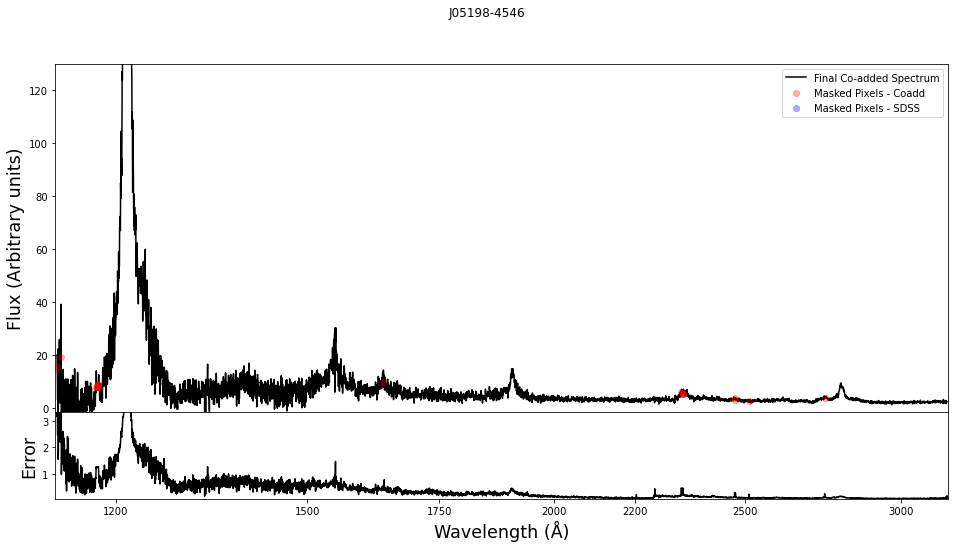

Good: J05198-4546


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 19.954728


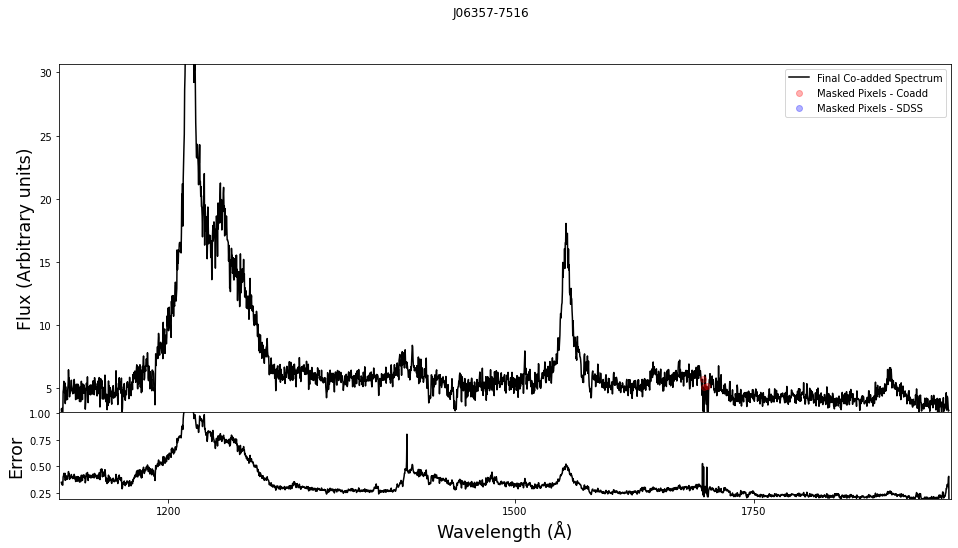

Good: J06357-7516


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 22.112861


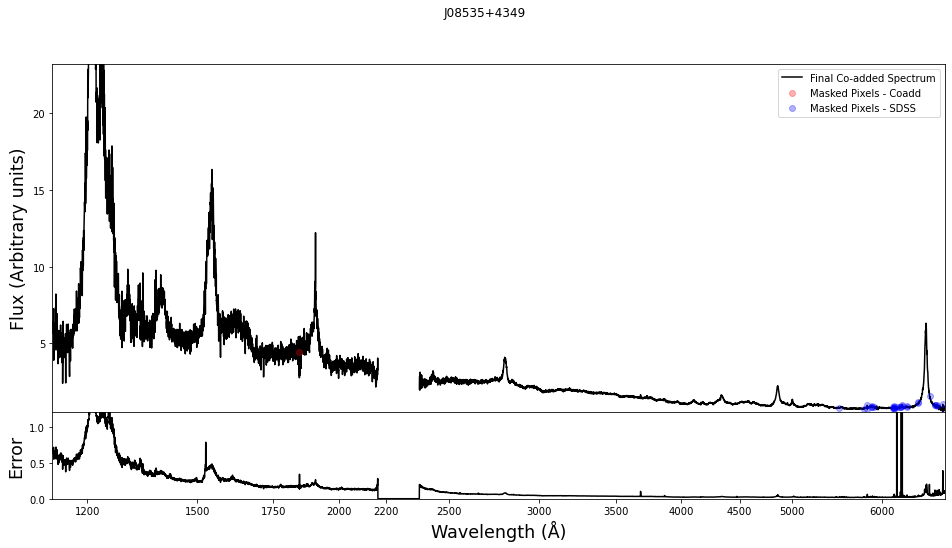

Good: J08535+4349


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 97.119400


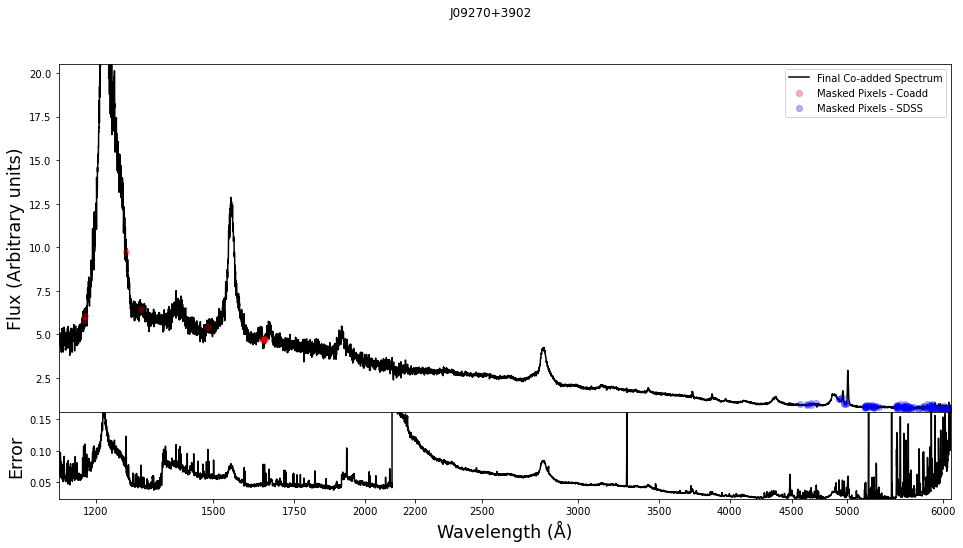

Good: J09270+3902


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 36.437284


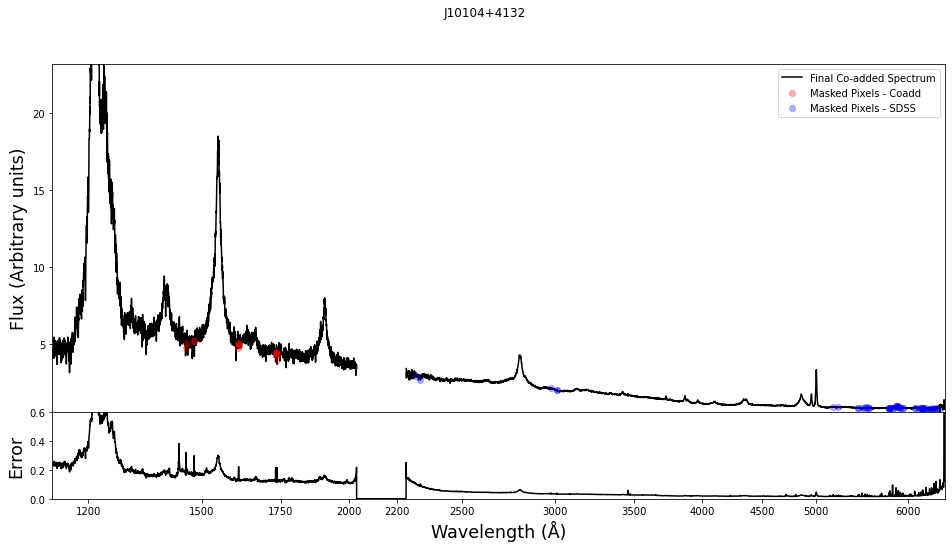

Good: J10104+4132


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 61.047479


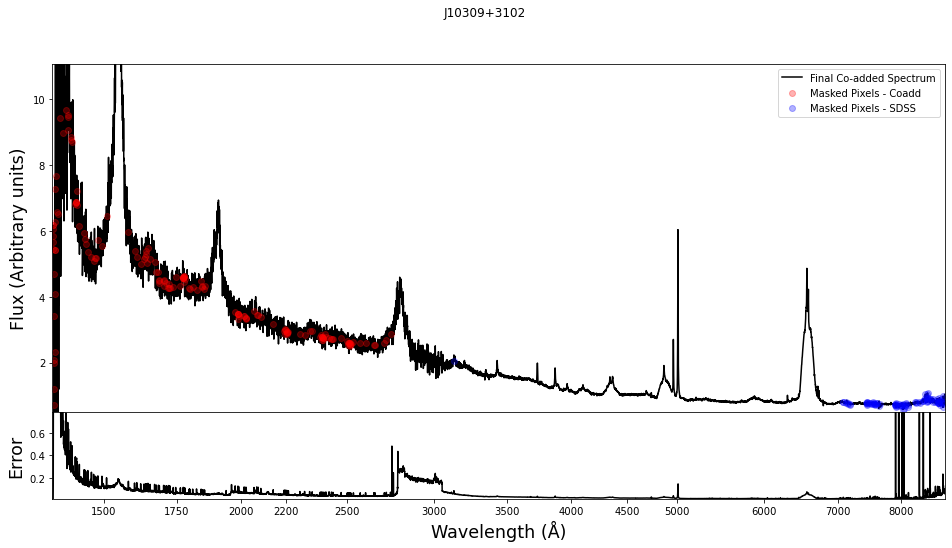

Good: J10309+3102


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Median wavelength resolution: 69.09 km/s
SNR is 7.994810


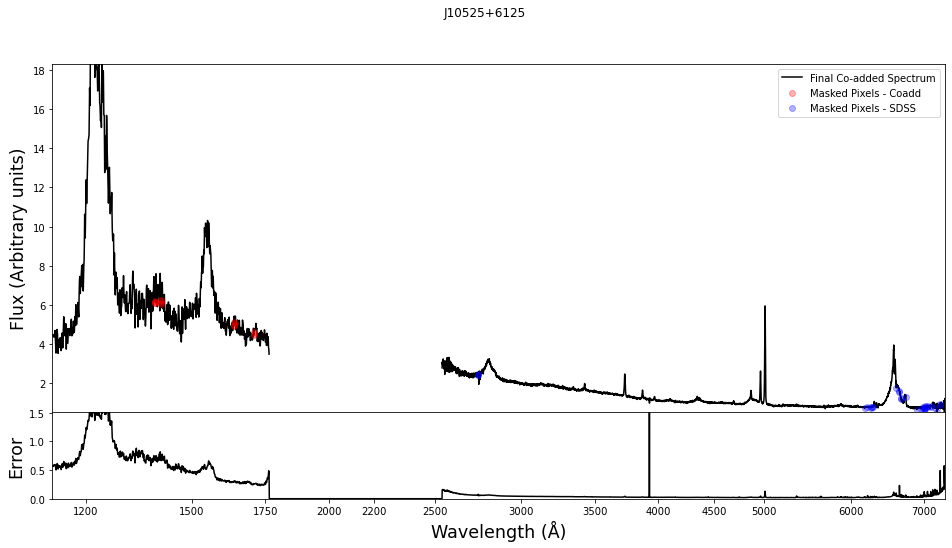

Good: J10525+6125


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 32.308818


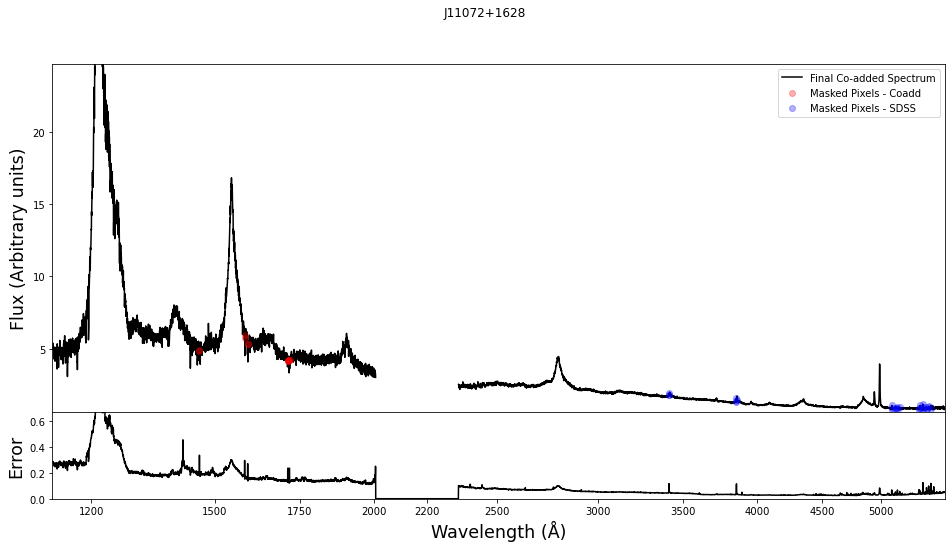

Good: J11072+1628


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 18.242541


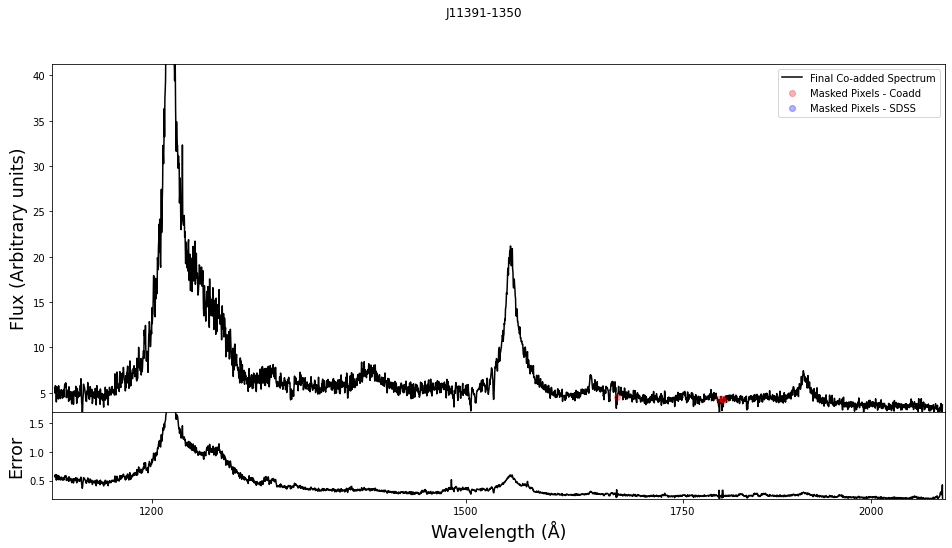

Good: J11391-1350
Median wavelength resolution: 69.09 km/s
SNR is 19.639832


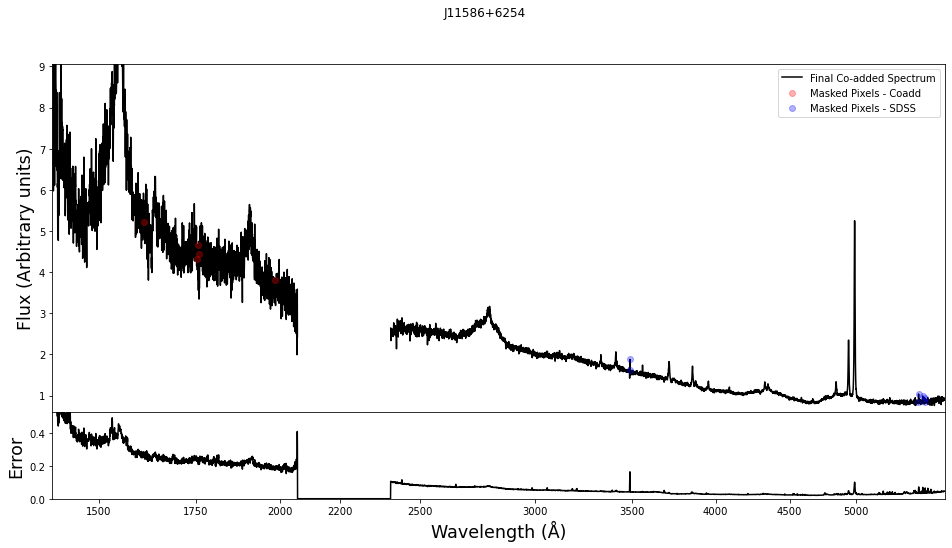

Good: J11586+6254


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 20.946665


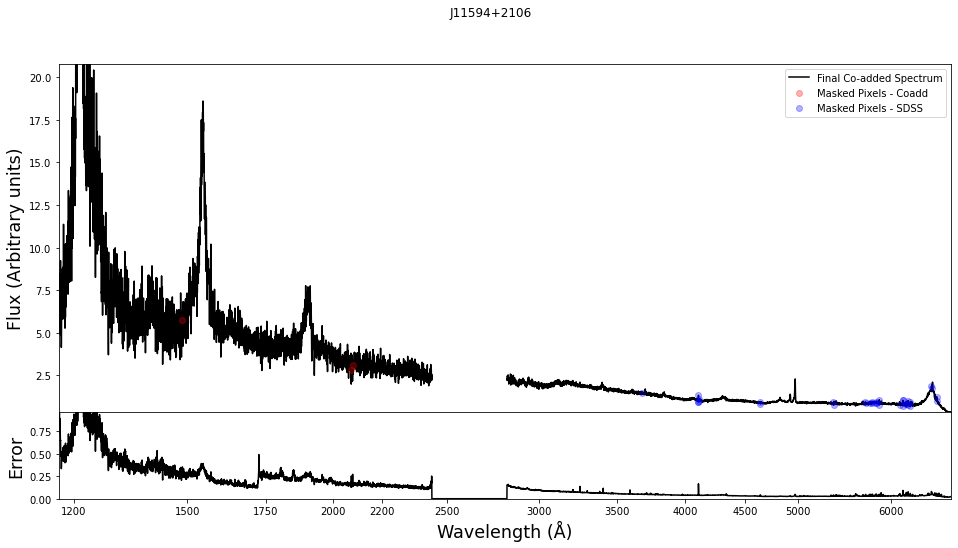

Good: J11594+2106


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 22.827141


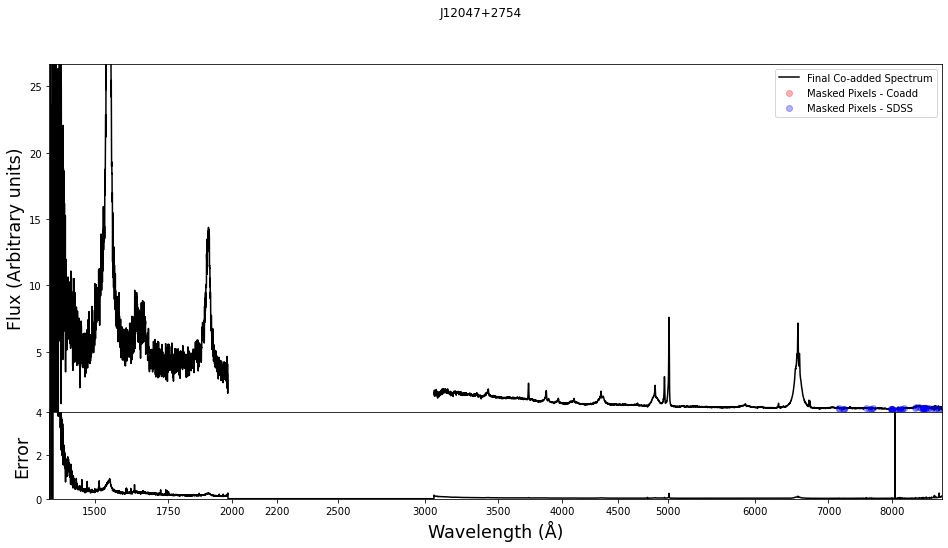

Good: J12047+2754


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 26.155045


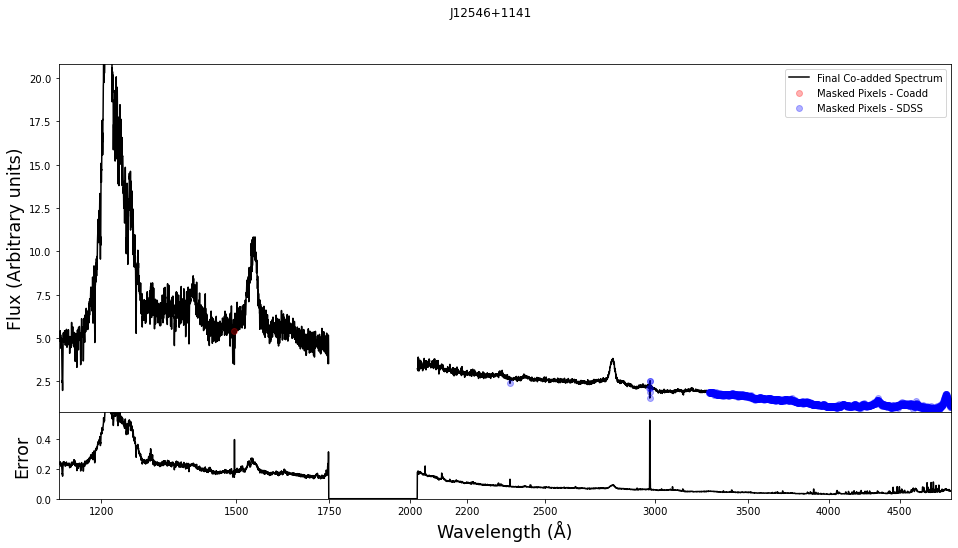

Good: J12546+1141


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_FOS_TVM.py:486: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 23.872819


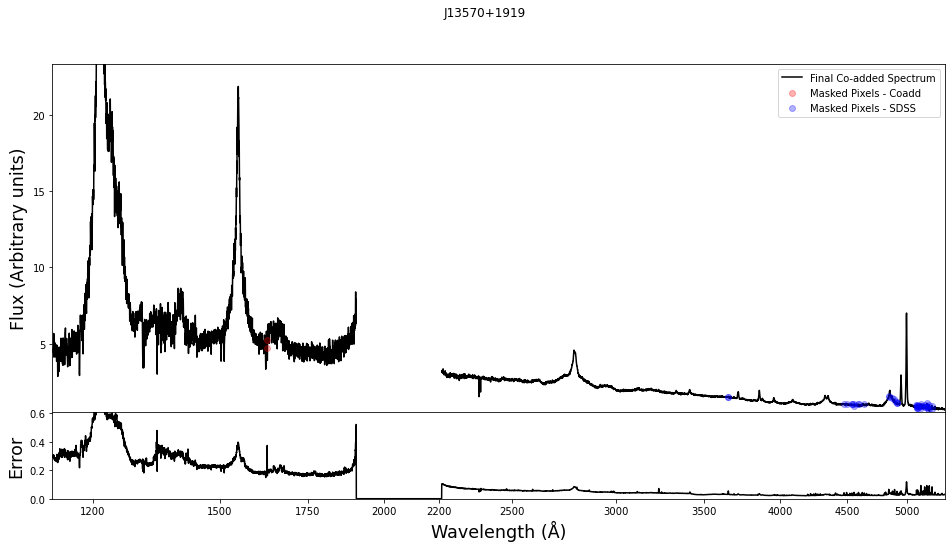

Good: J13570+1919
Median wavelength resolution: 69.09 km/s
SNR is 14.075276


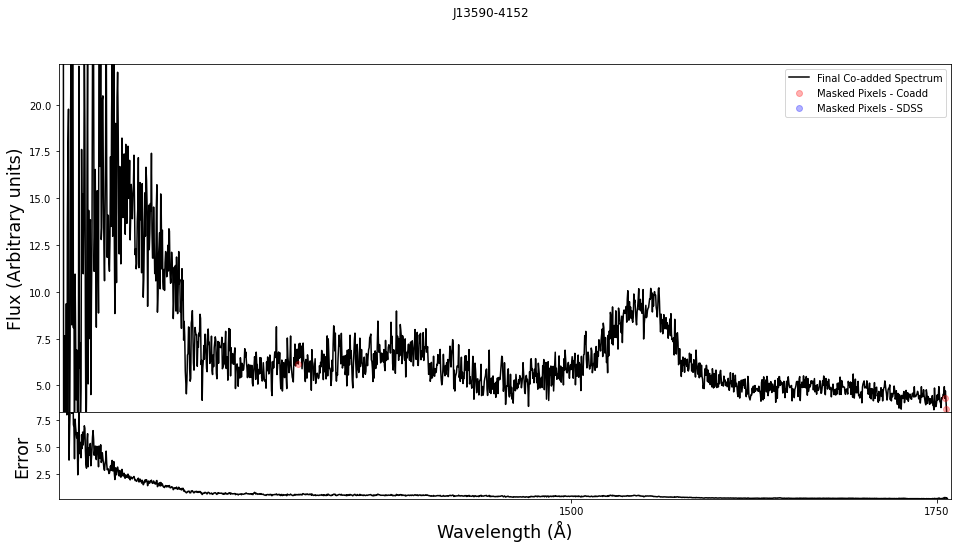

Good: J13590-4152


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 28.774749


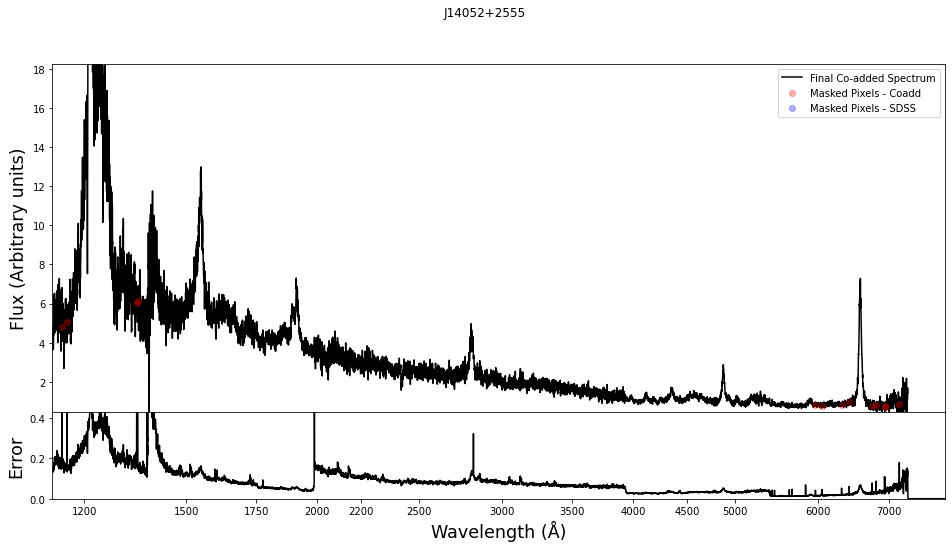

Good: J14052+2555
Median wavelength resolution: 69.09 km/s
Coadd for J14190-1310 is not viable.
SNR is 3.417634


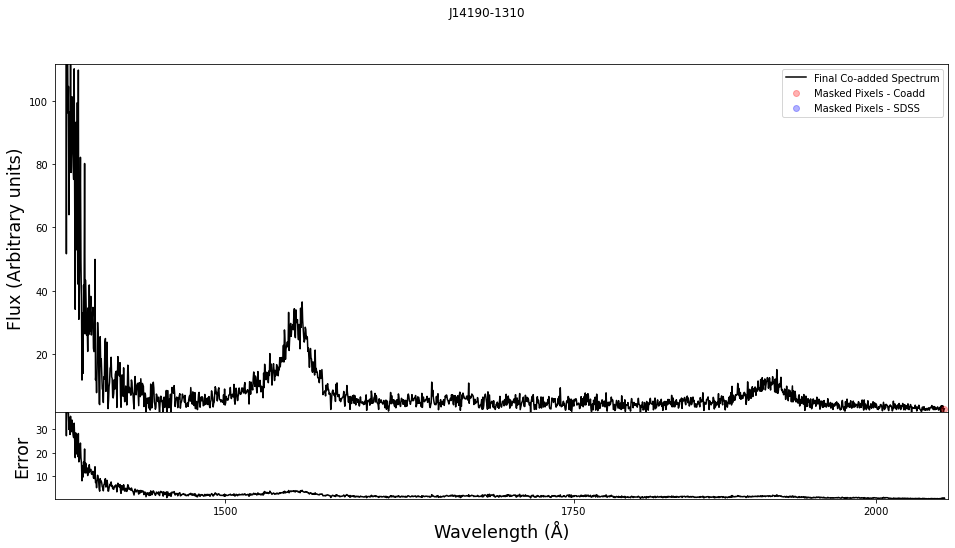

Good: J14190-1310


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_FOS_TVM.py:486: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 37.440750


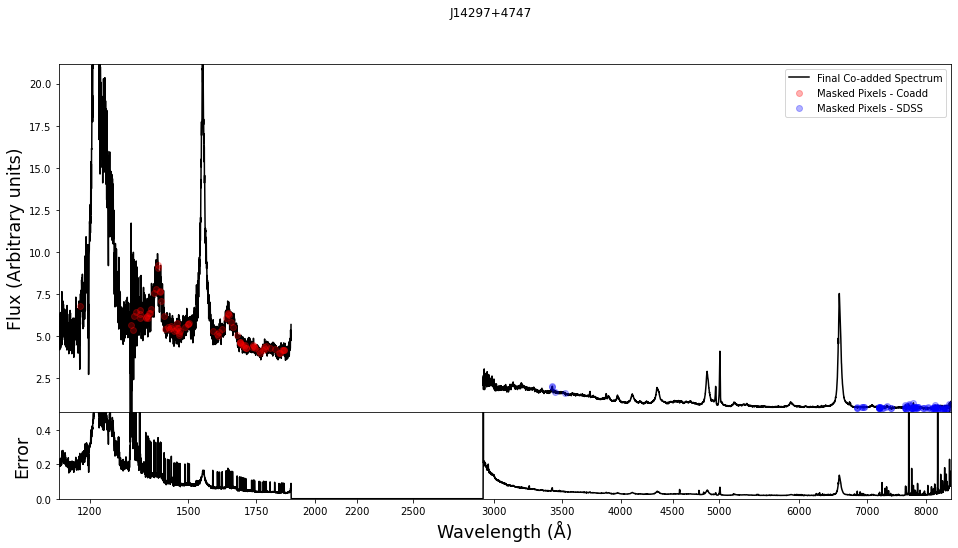

Good: J14297+4747


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 38.882813


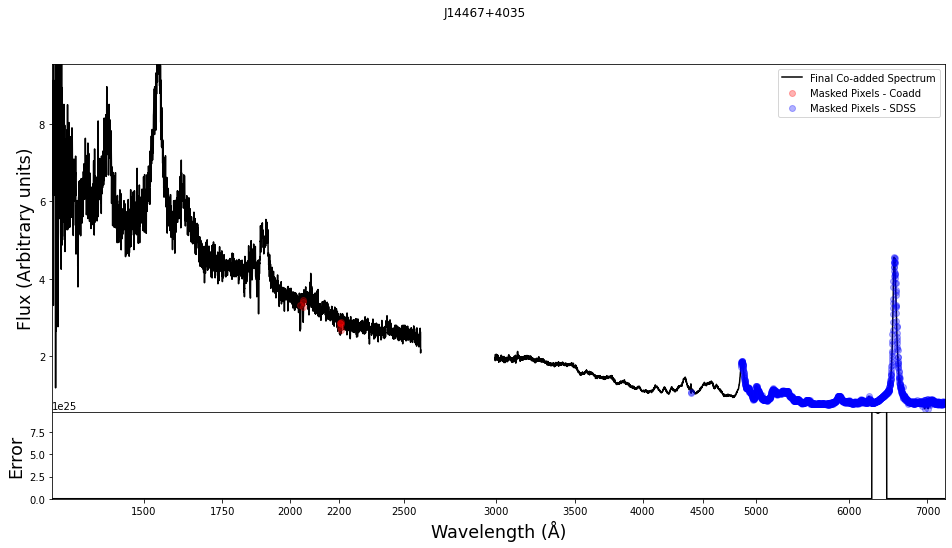

Good: J14467+4035
Median wavelength resolution: 69.09 km/s
SNR is 9.643257


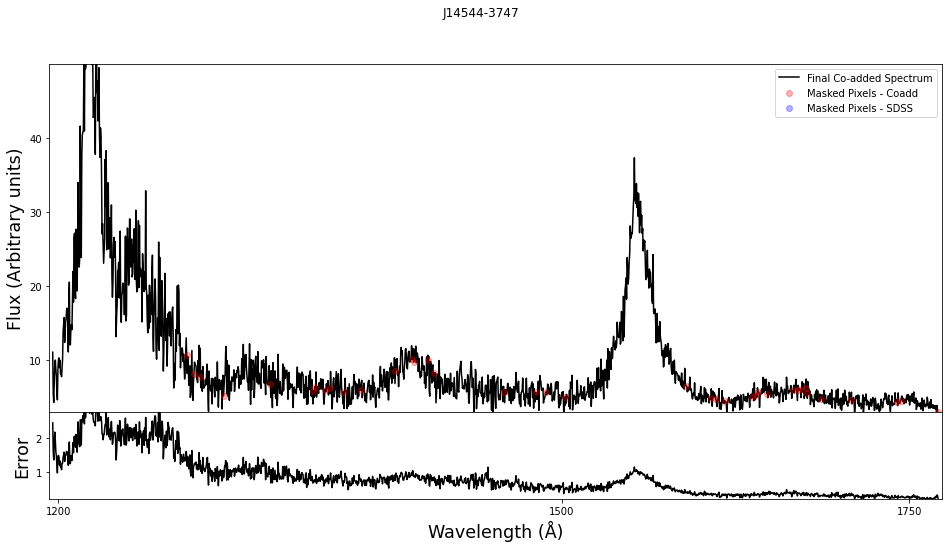

Good: J14544-3747


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 16.862669


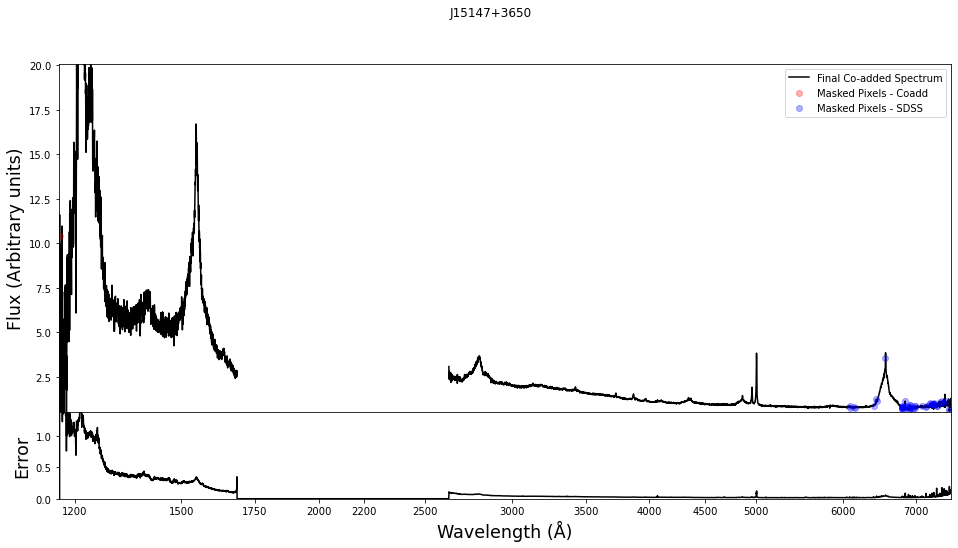

Good: J15147+3650


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 41.885103


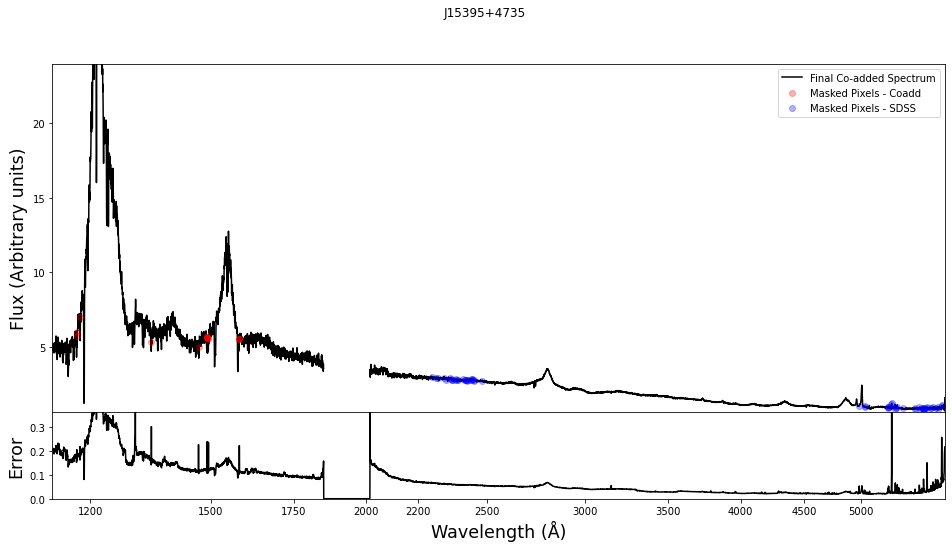

Good: J15395+4735


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 70.677982


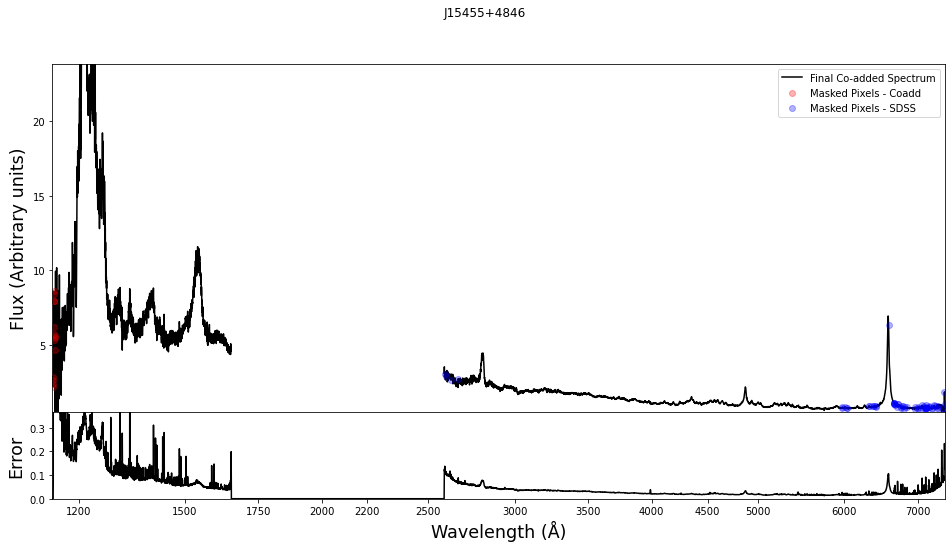

Good: J15455+4846


../../AllHSTCode/Read_FOS_TVM.py:486: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 11.086311


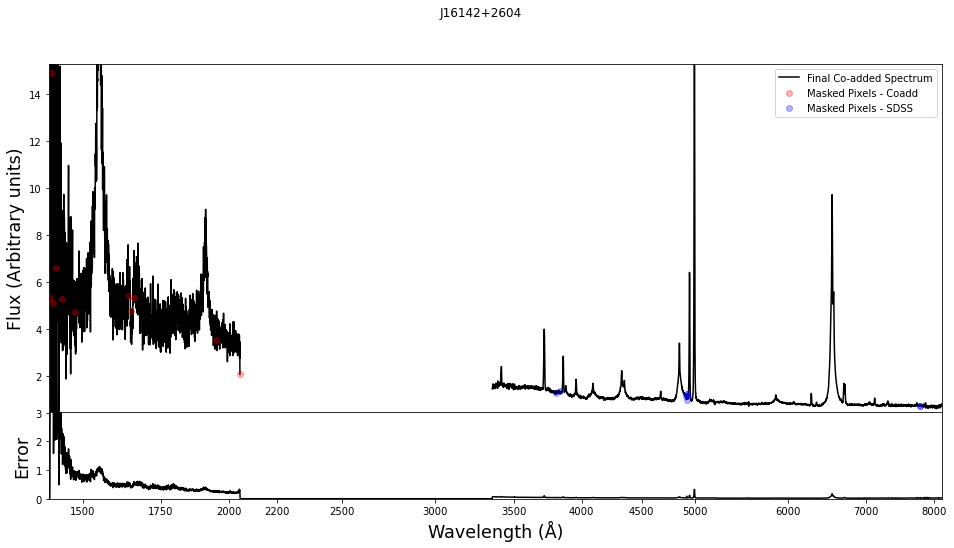

Good: J16142+2604


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 26.136981


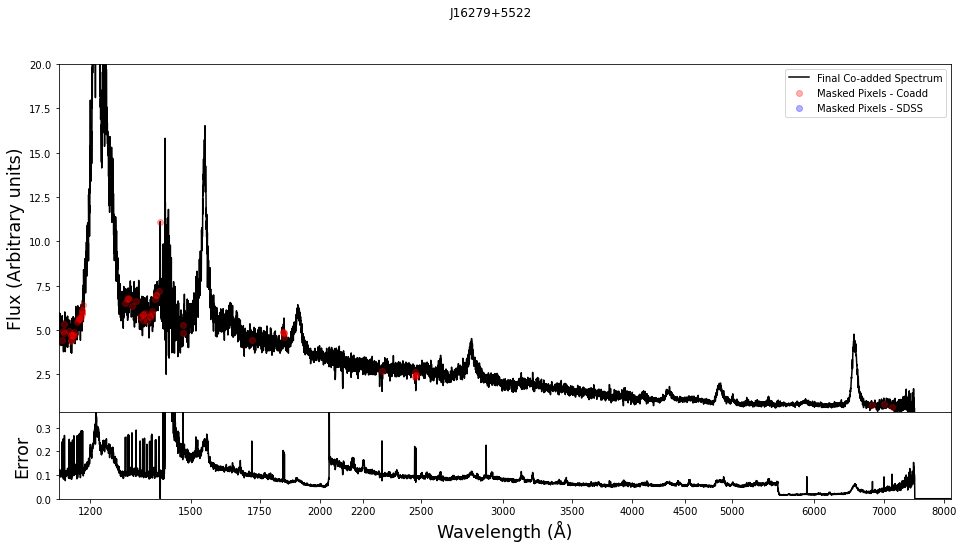

Good: J16279+5522


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_FOS_TVM.py:486: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
Coadd for J16303+3756 is not viable.
SNR is 1.256177


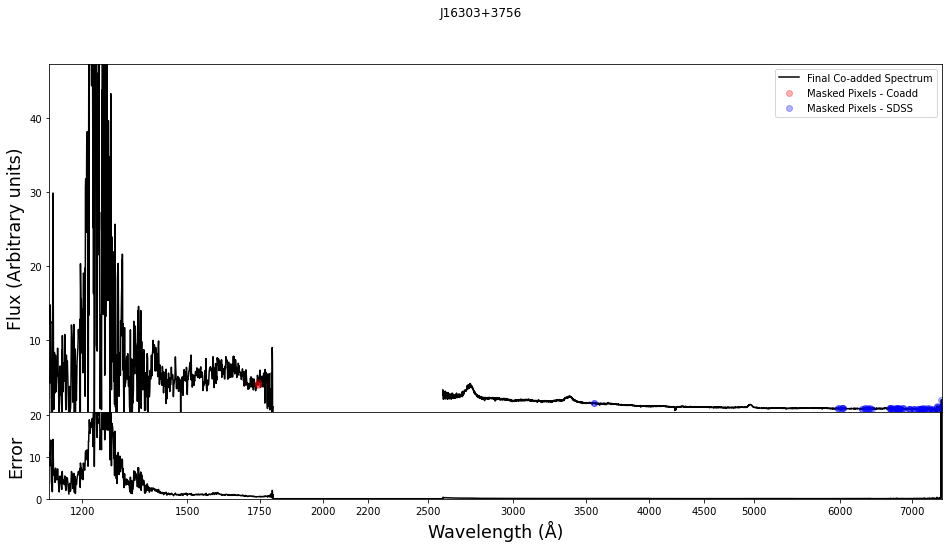

Good: J16303+3756


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/LowerResHSTRebin_TVM.py:102: RuntimeWarning: invalid value encountered in sqrt
  fluxerr_HST_rebin[i] = (m_err*wave_HST_rebin[i] + b_err) * np.sqrt(old_width/new_width)
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 30.662880


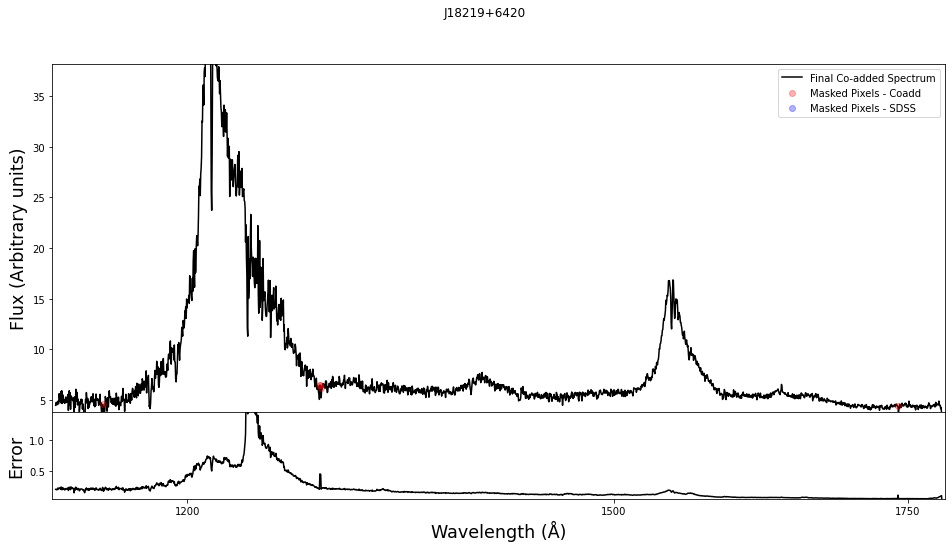

Good: J18219+6420


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 44.803829


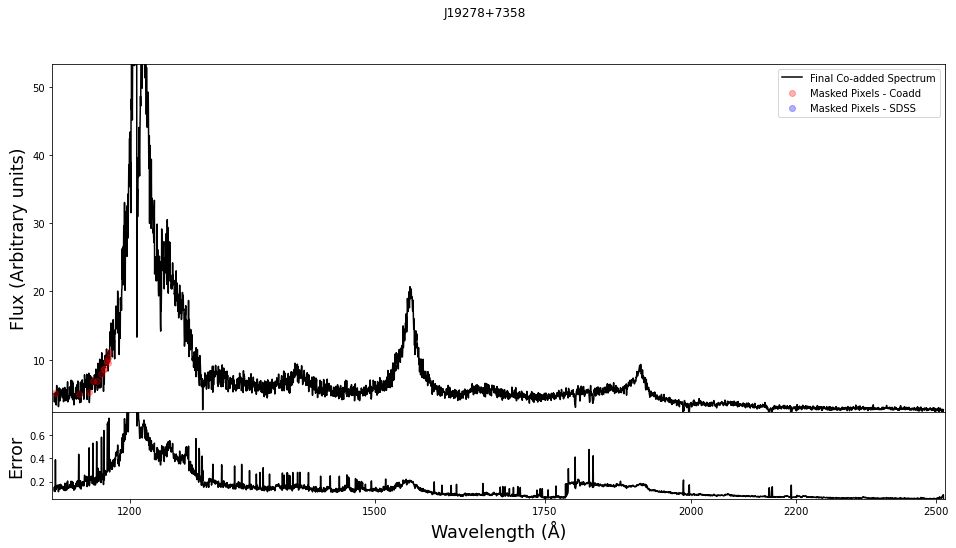

Good: J19278+7358


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 35.226018


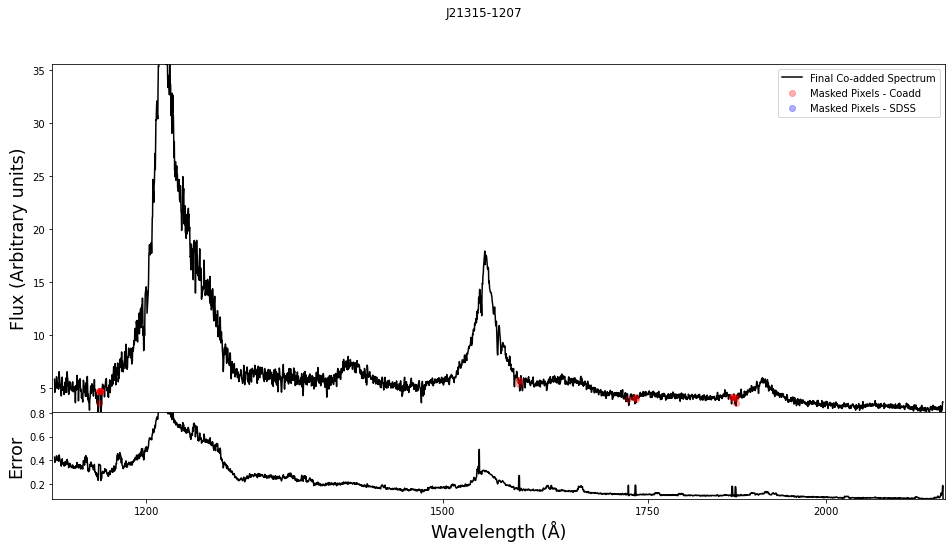

Good: J21315-1207


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Median wavelength resolution: 69.09 km/s
SNR is 8.010973


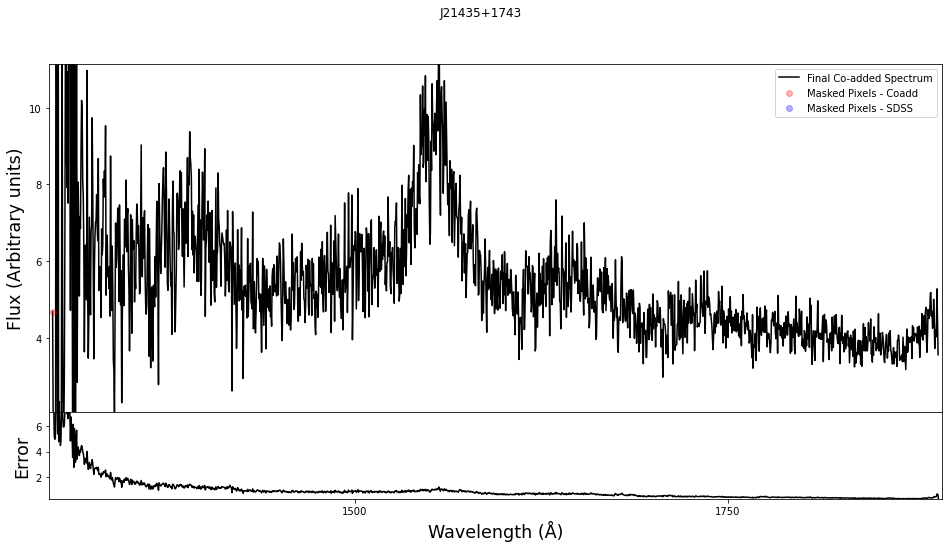

Good: J21435+1743


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 18.810028


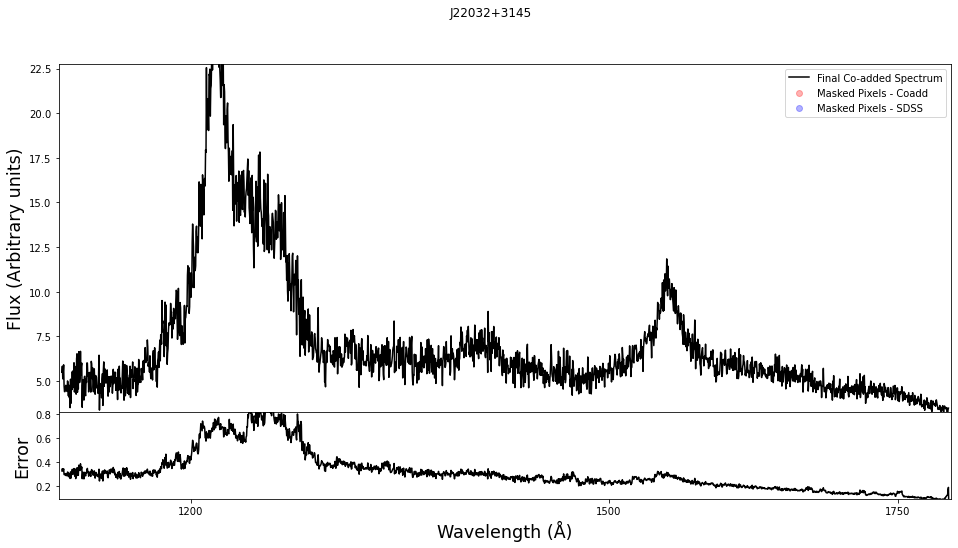

Good: J22032+3145


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 16.917055


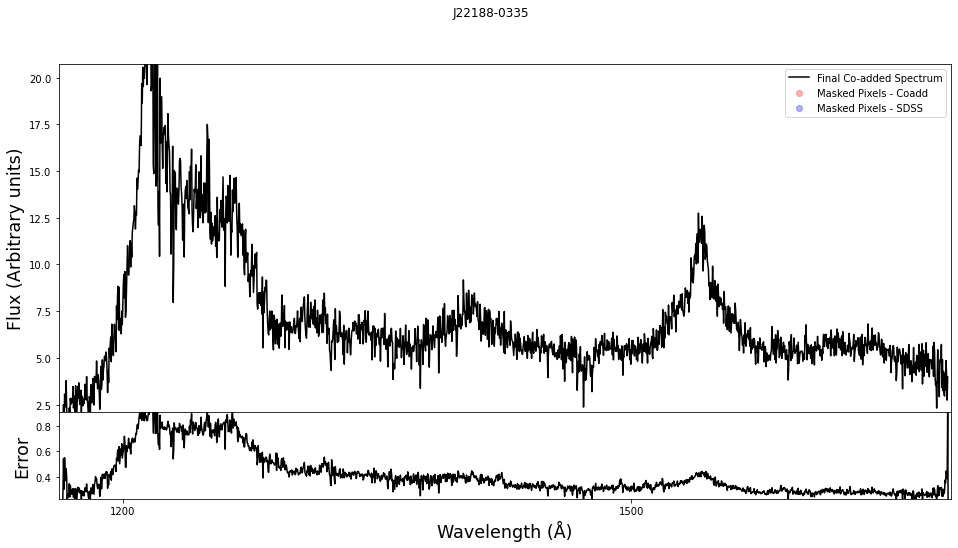

Good: J22188-0335


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 26.935067


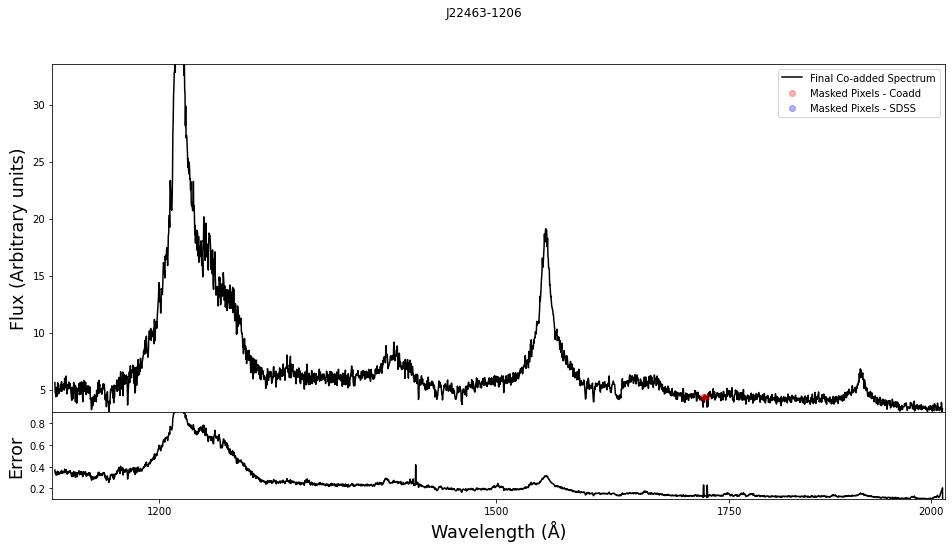

Good: J22463-1206


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 19.433703


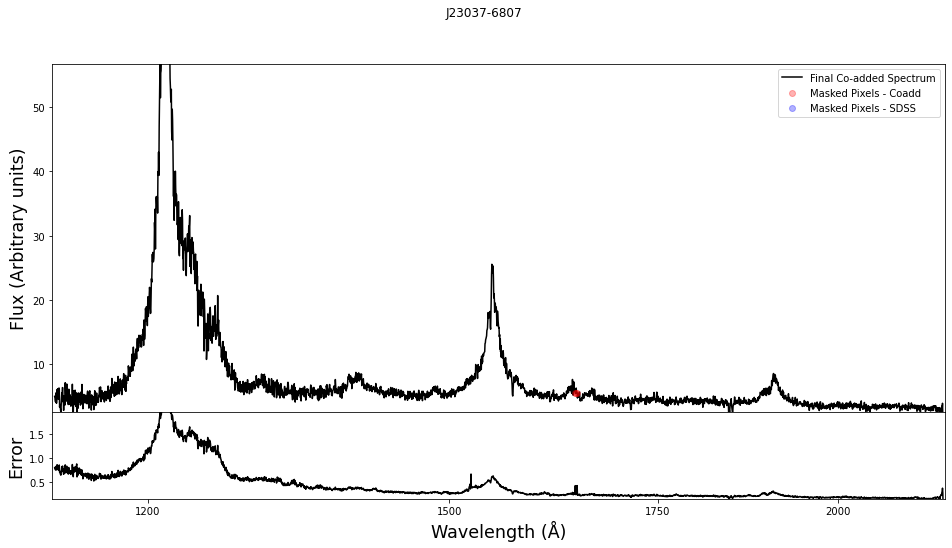

Good: J23037-6807


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 25.237801


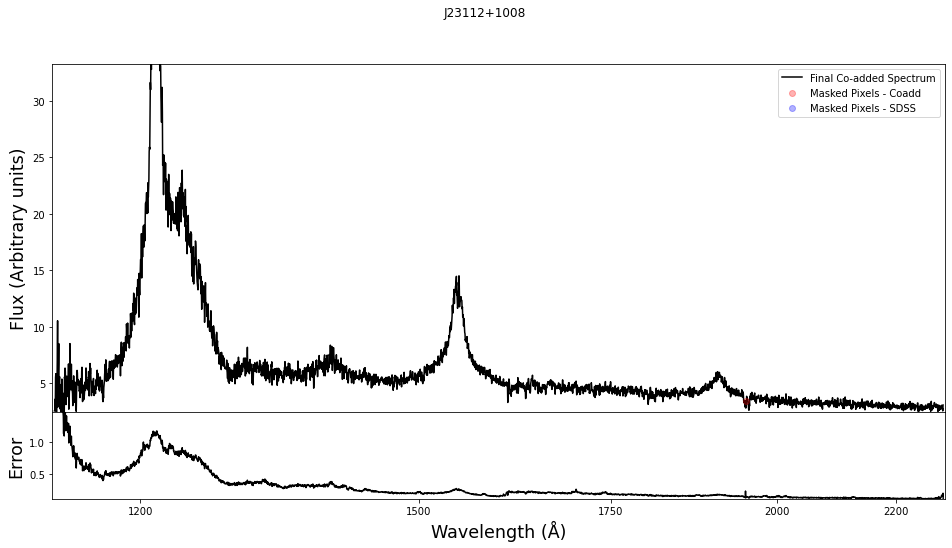

Good: J23112+1008


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 24.011694


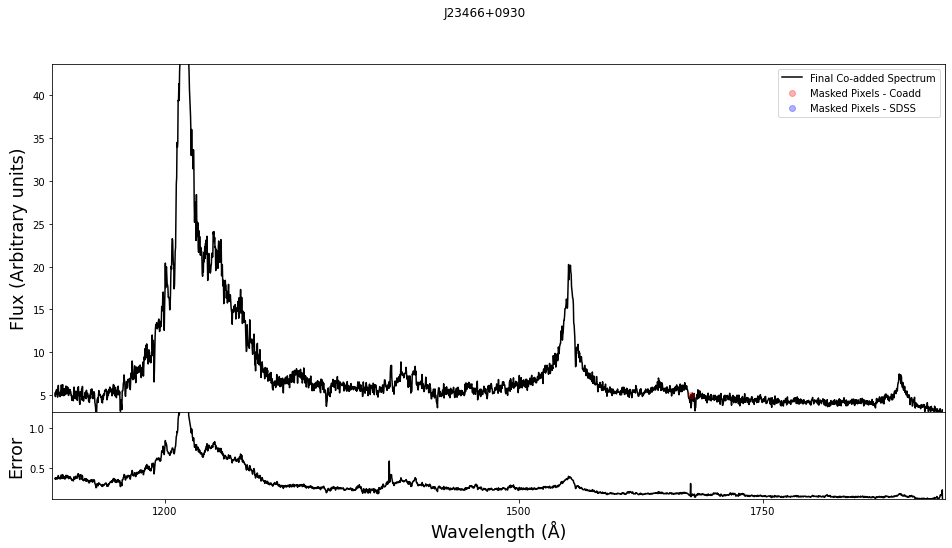

Good: J23466+0930


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:486: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
Coadd for J23519-0109 is not viable.
SNR is 6.768850


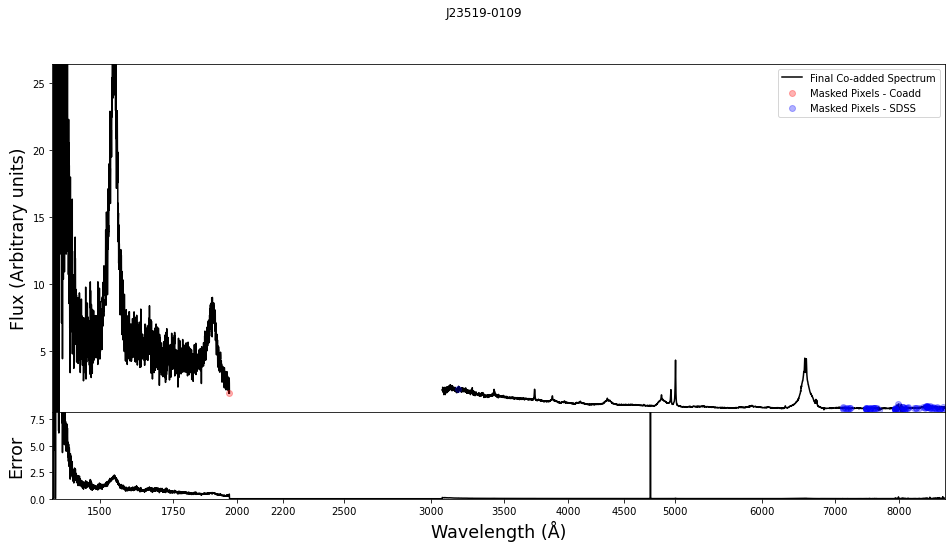

Good: J23519-0109


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Median wavelength resolution: 69.09 km/s
SNR is 18.367693


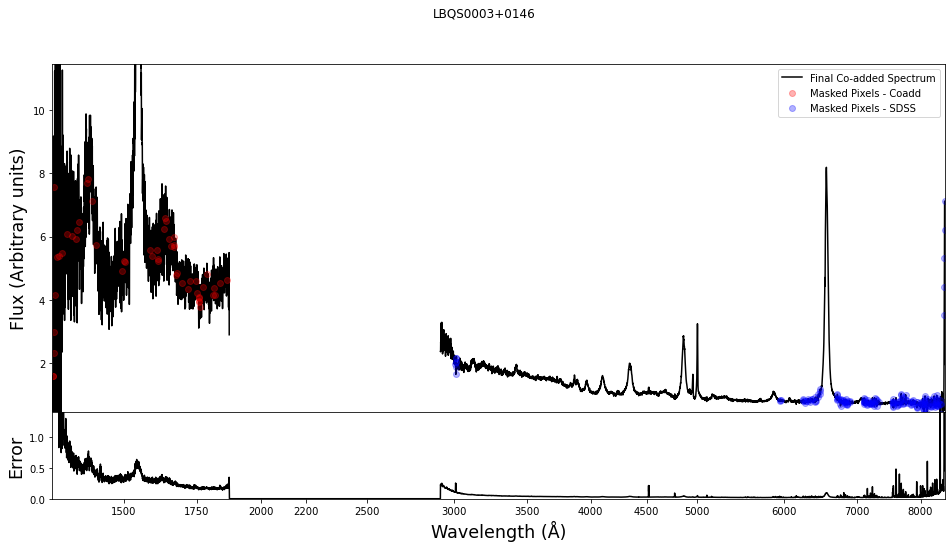

Good: LBQS0003+0146
Median wavelength resolution: 69.09 km/s
SNR is 11.674219


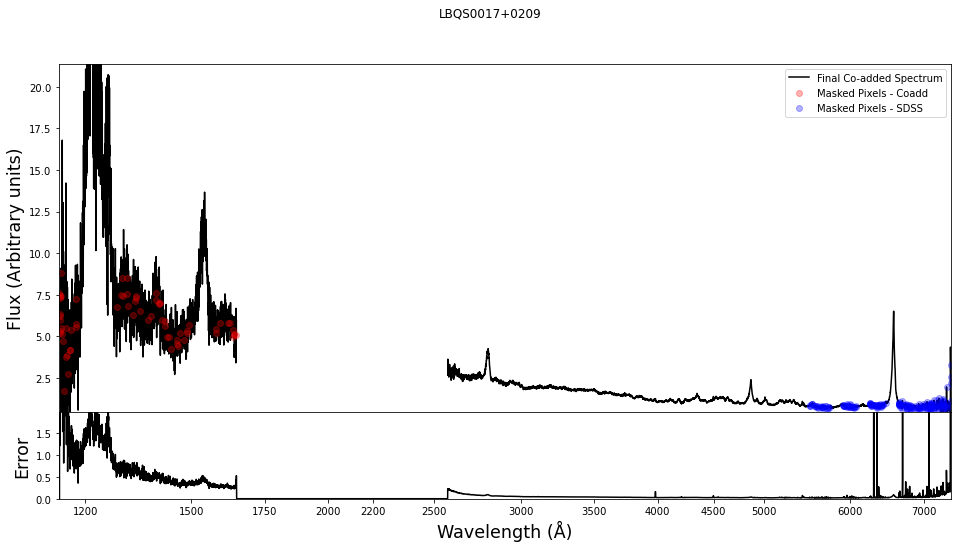

Good: LBQS0017+0209
Median wavelength resolution: 69.09 km/s
SNR is 14.280959


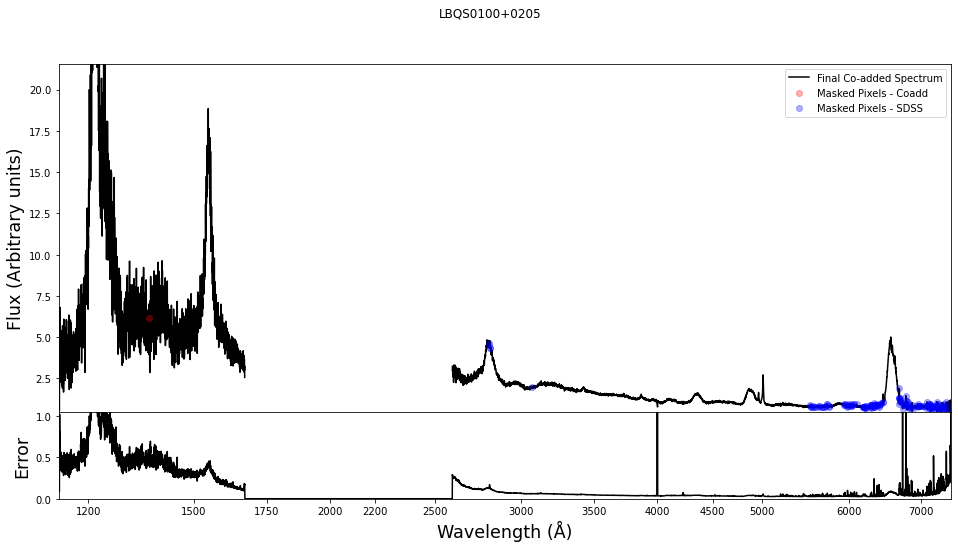

Good: LBQS0100+0205
Median wavelength resolution: 69.09 km/s
SNR is 13.409986


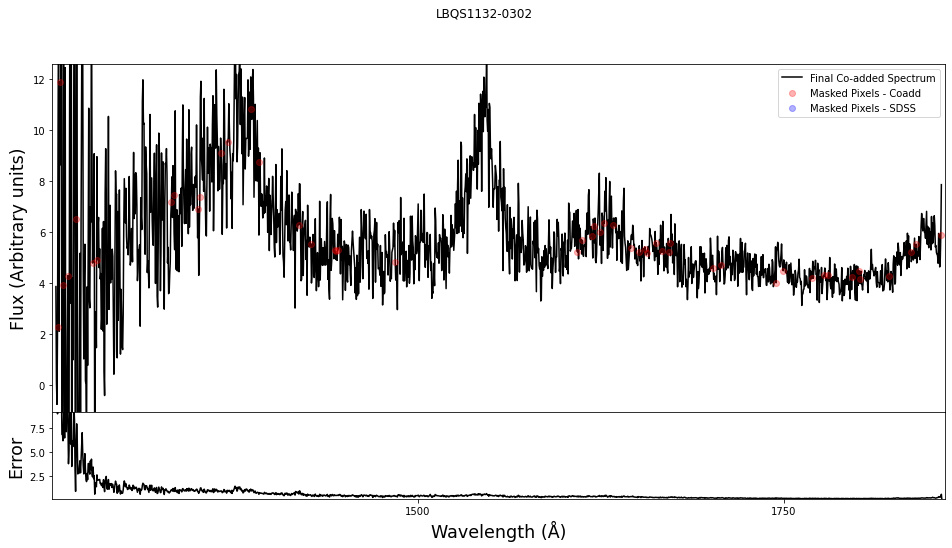

Good: LBQS1132-0302
Median wavelength resolution: 69.09 km/s
SNR is 13.221500


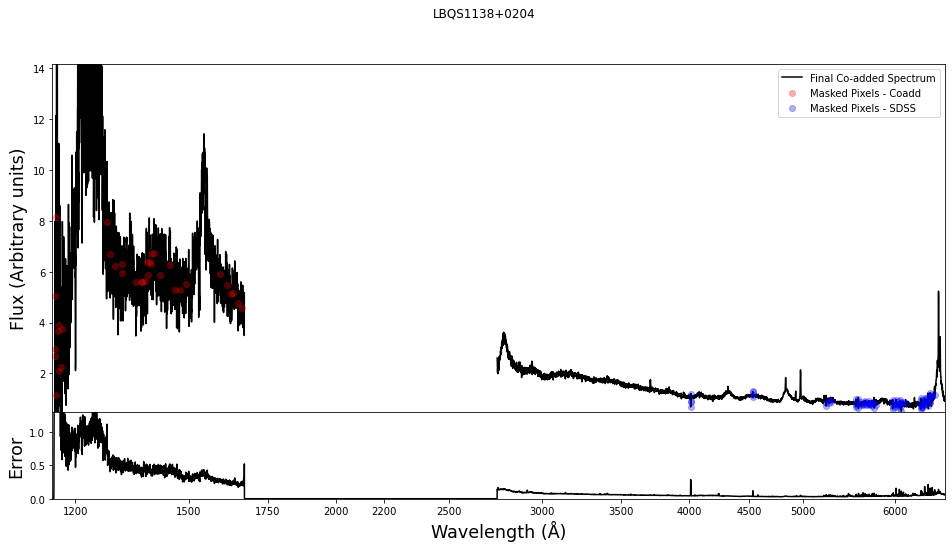

Good: LBQS1138+0204


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Median wavelength resolution: 69.09 km/s
SNR is 7.005843


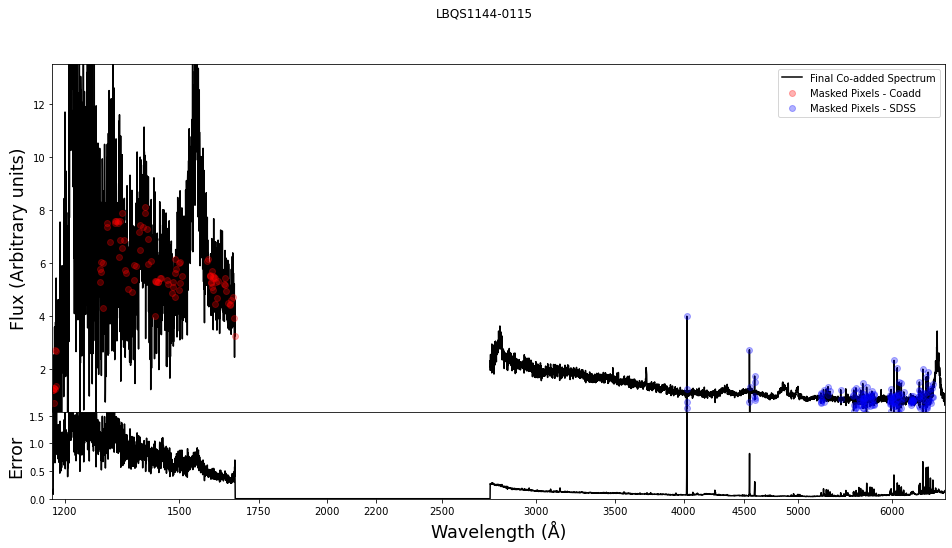

Good: LBQS1144-0115


../../AllHSTCode/Read_FOS_TVM.py:486: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 11.393015


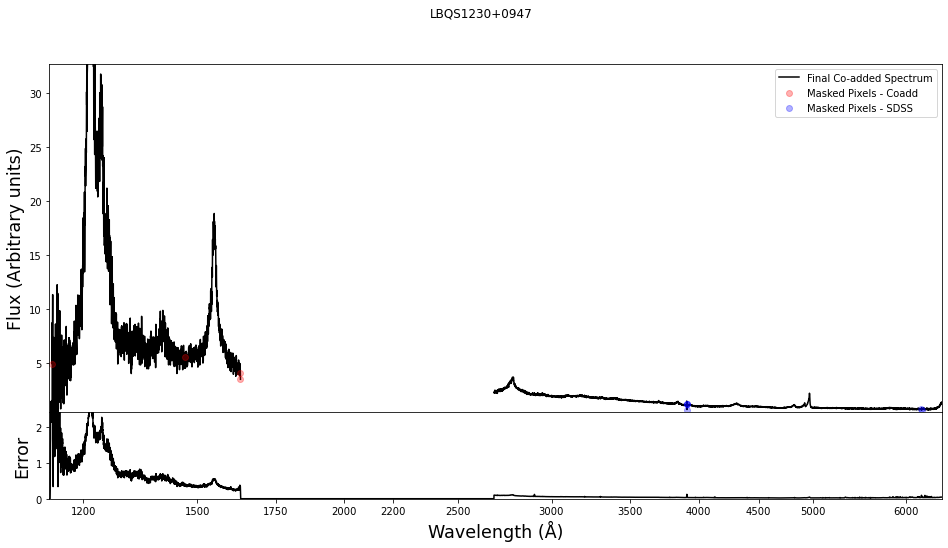

Good: LBQS1230+0947


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 17.382982


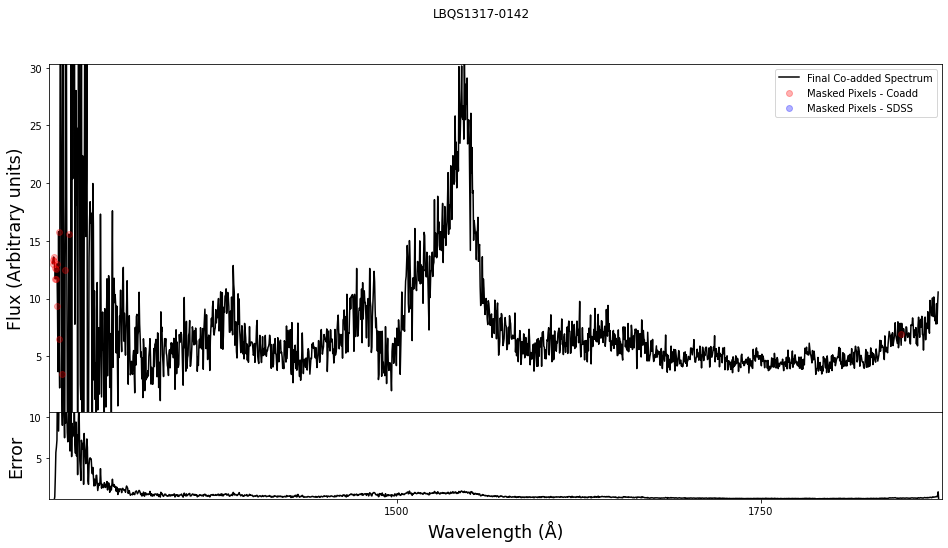

Good: LBQS1317-0142


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 45.819782


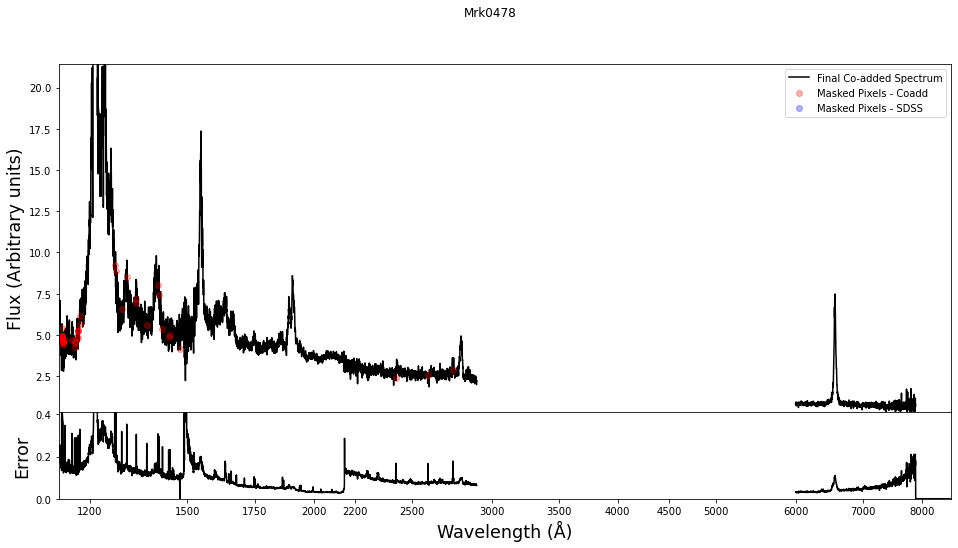

Good: Mrk0478


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/LowerResHSTRebin_TVM.py:102: RuntimeWarning: invalid value encountered in sqrt
  fluxerr_HST_rebin[i] = (m_err*wave_HST_rebin[i] + b_err) * np.sqrt(old_width/new_width)
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_FOS_TVM.py:486: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 38.696682


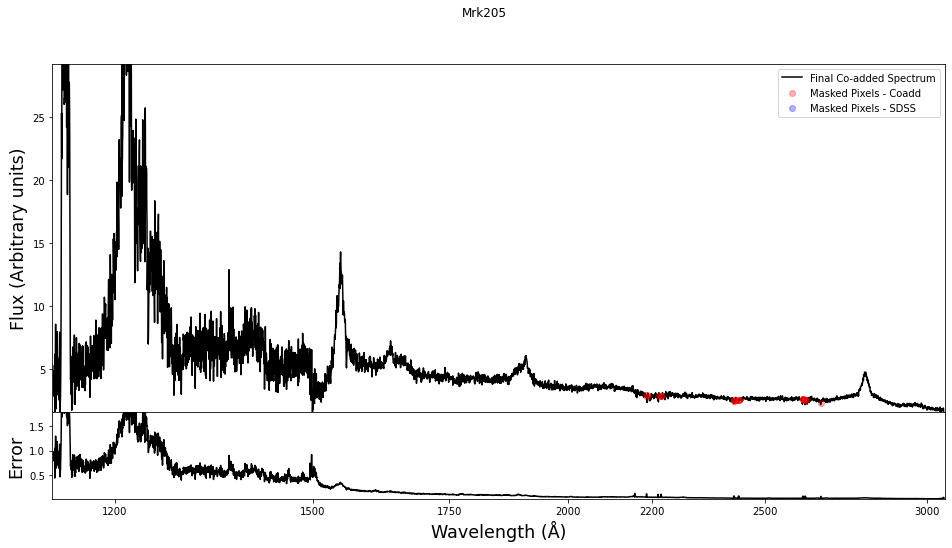

Good: Mrk205
Median wavelength resolution: 69.09 km/s
SNR is 13.437495


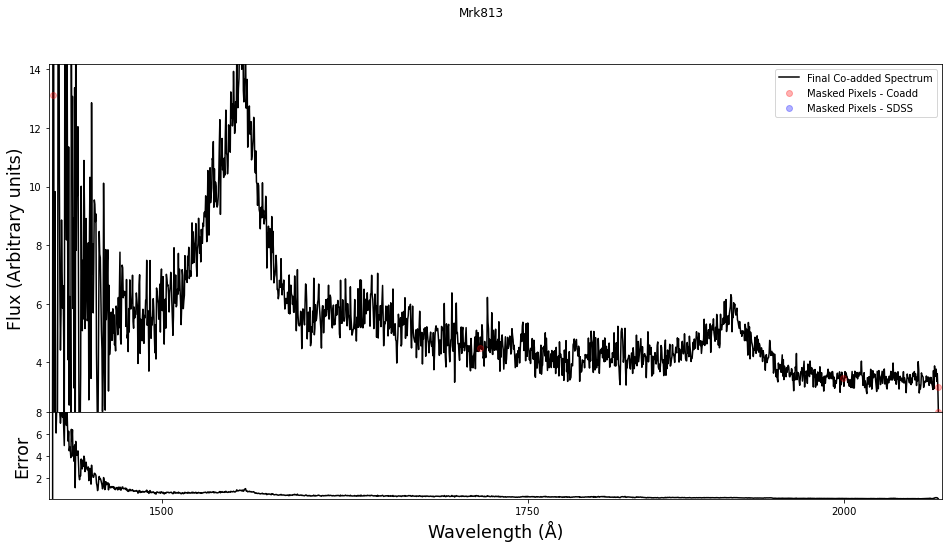

Good: Mrk813


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
Coadd for NGC1275 is not viable.
SNR is 1.850069


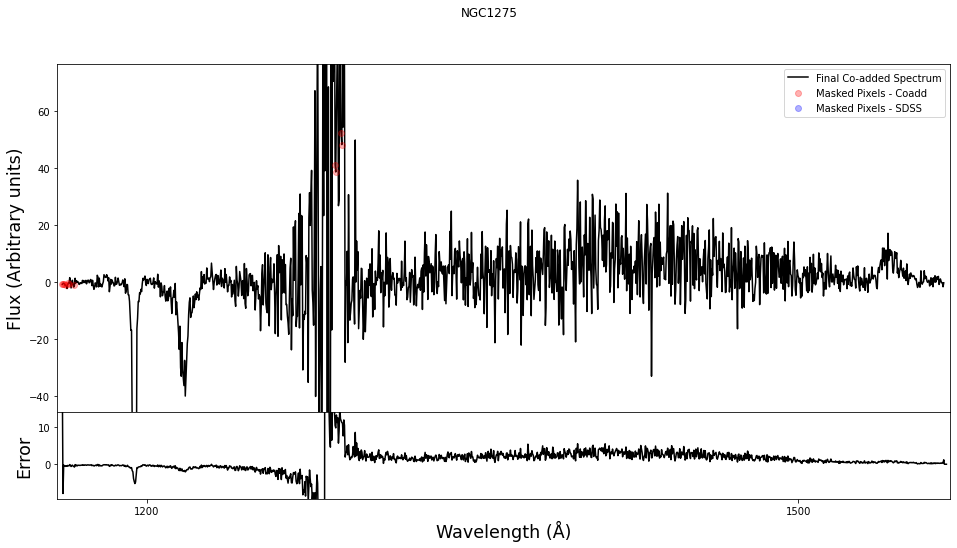

Good: NGC1275


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 49.820493


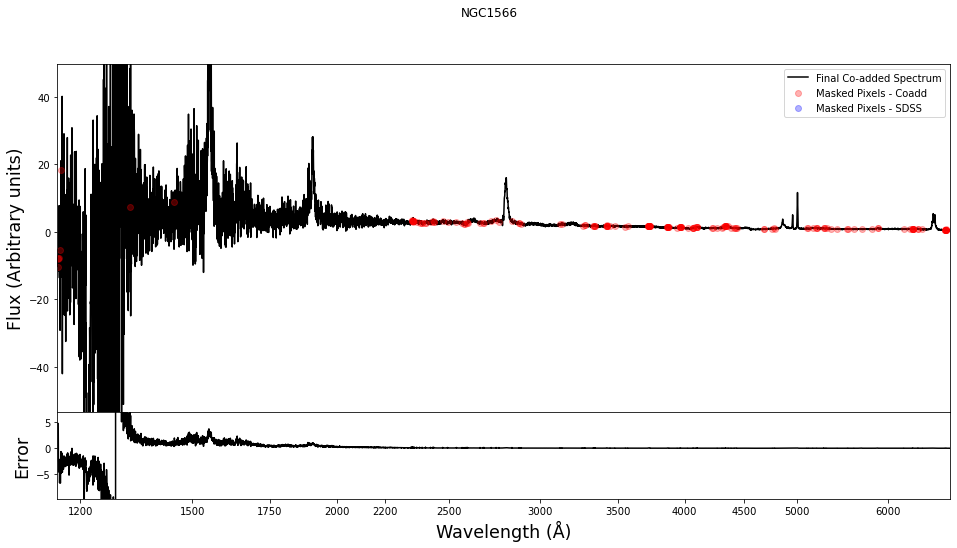

Good: NGC1566


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 27.039460


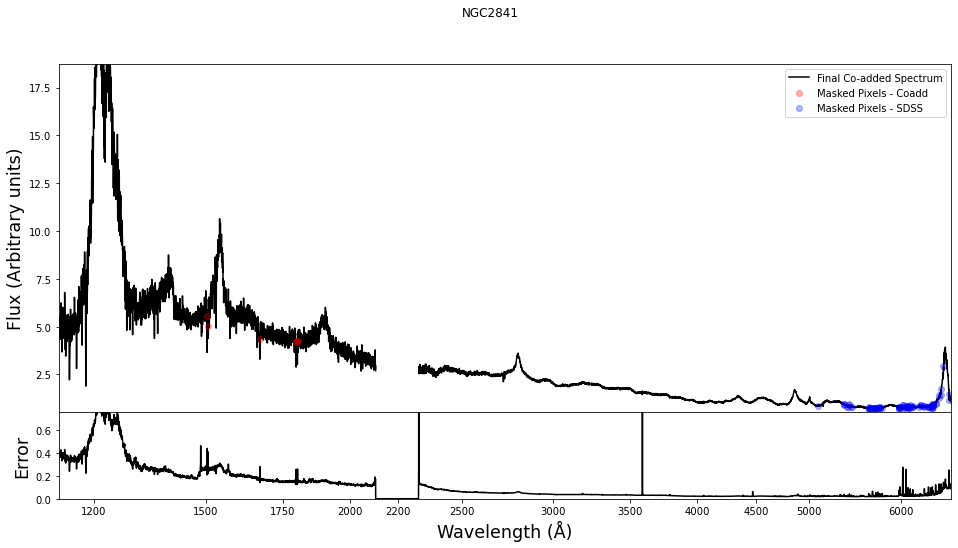

Good: NGC2841


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 55.789208


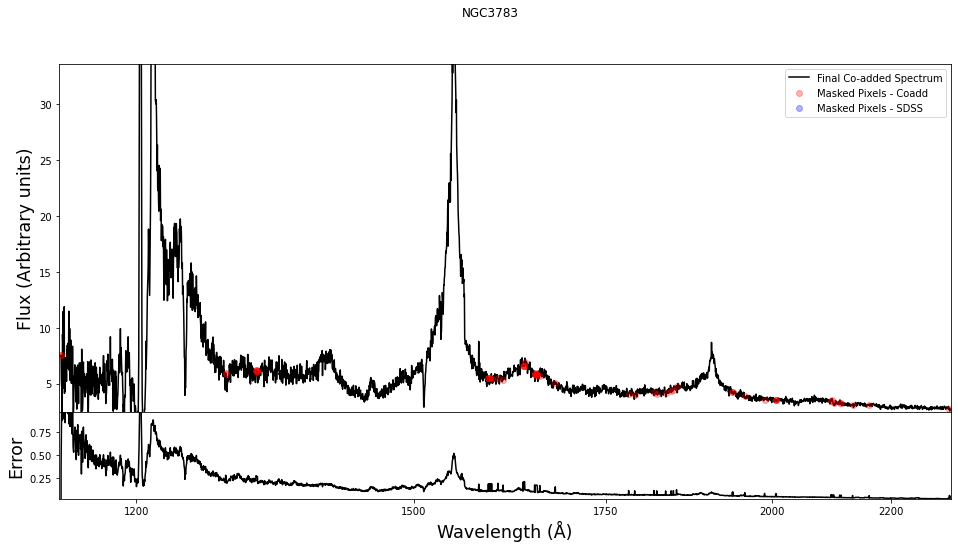

Good: NGC3783


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 195.456102


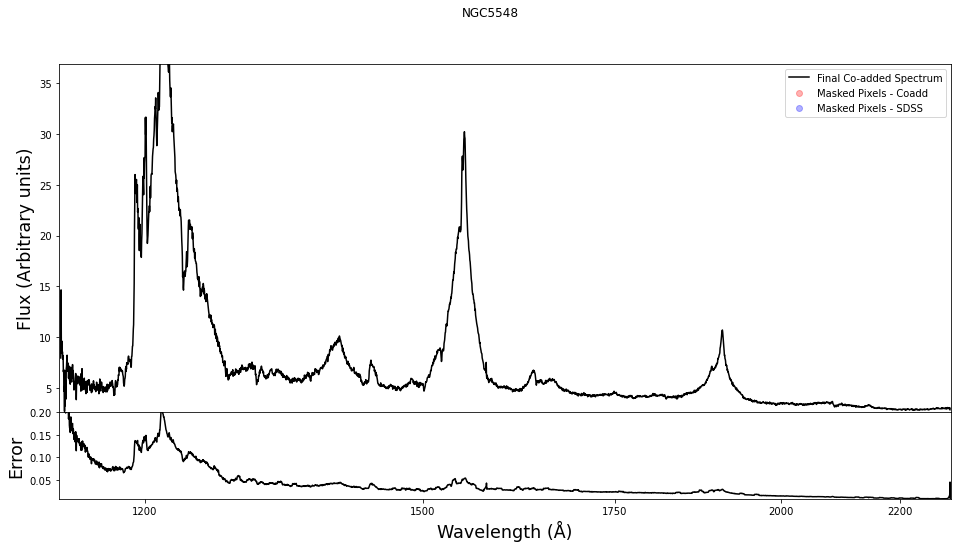

Good: NGC5548


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 69.543121


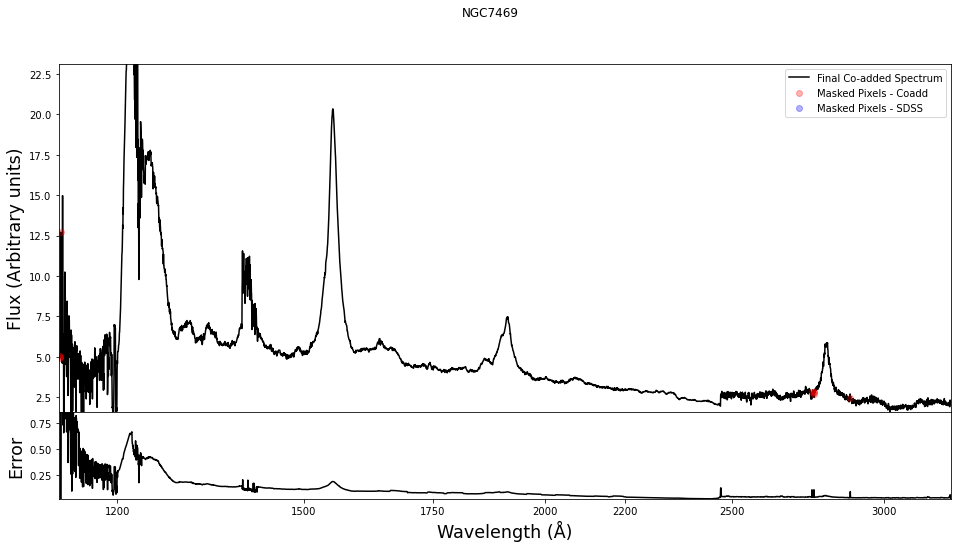

Good: NGC7469


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 45.347793


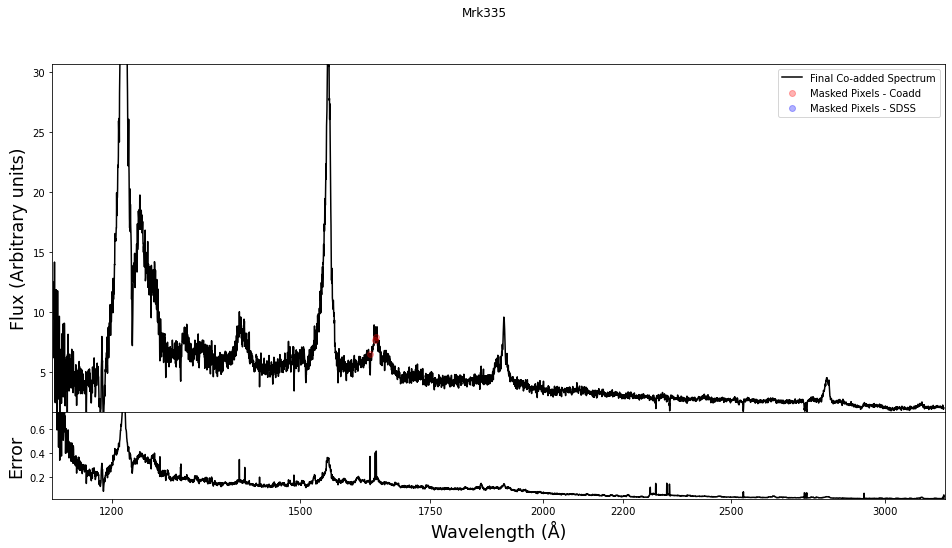

Good: Mrk335


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


Median wavelength resolution: 69.09 km/s
SNR is 13.890483


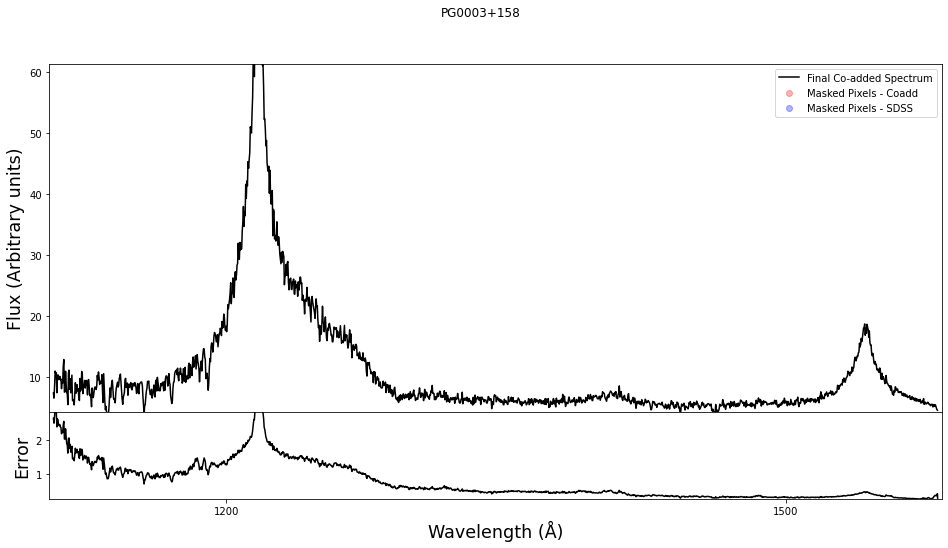

Good: PG0003+158


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 54.013485


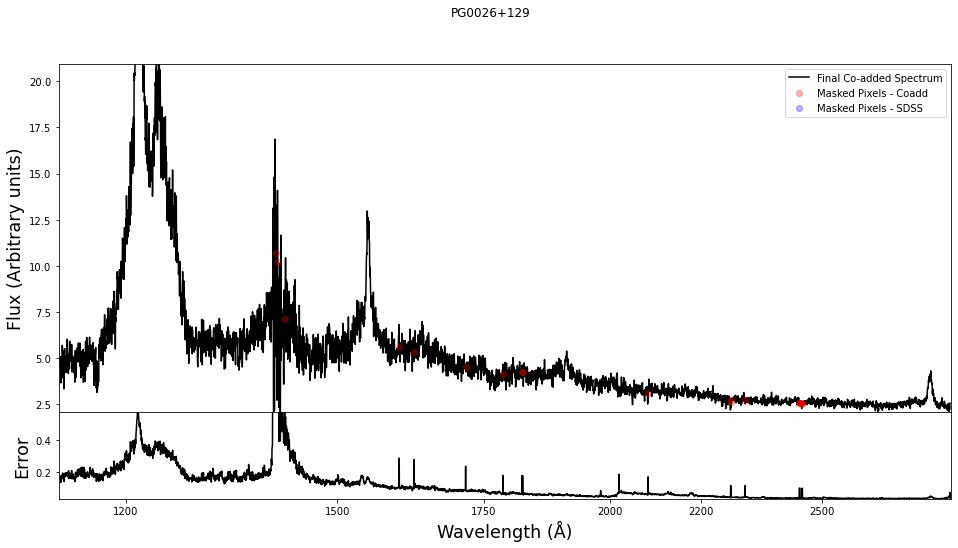

Good: PG0026+129


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 19.877109


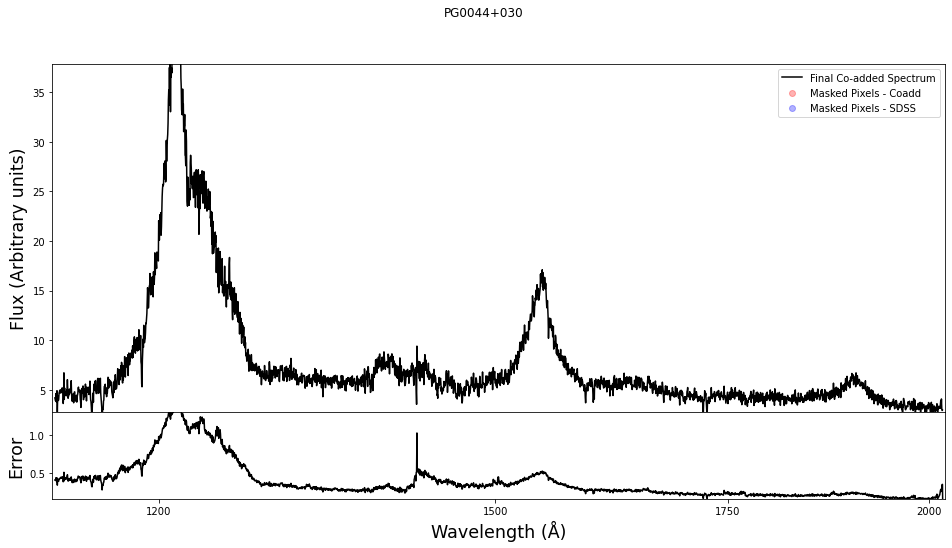

Good: PG0044+030
Median wavelength resolution: 69.09 km/s
SNR is 17.449382


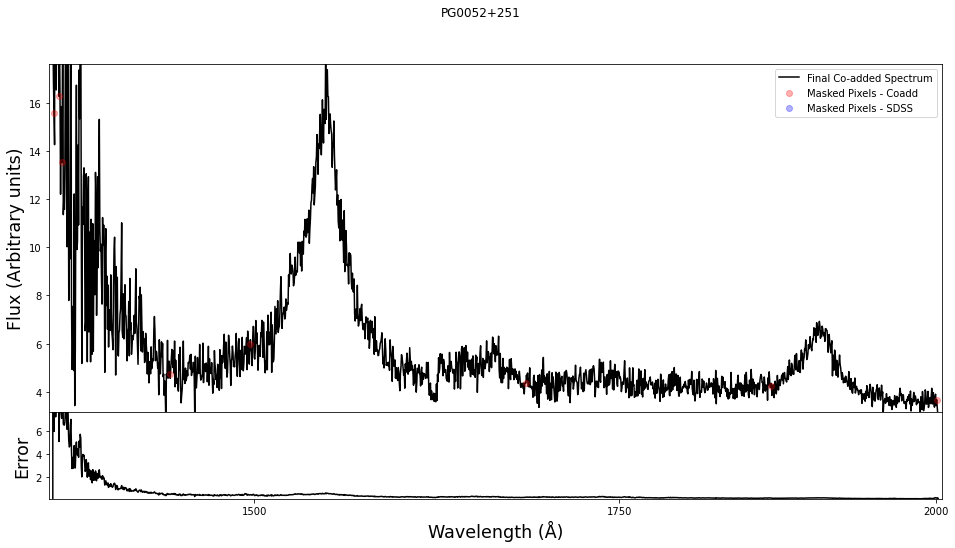

Good: PG0052+251


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])
../../AllHSTCode/Read_FOS_TVM.py:486: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 31.308884


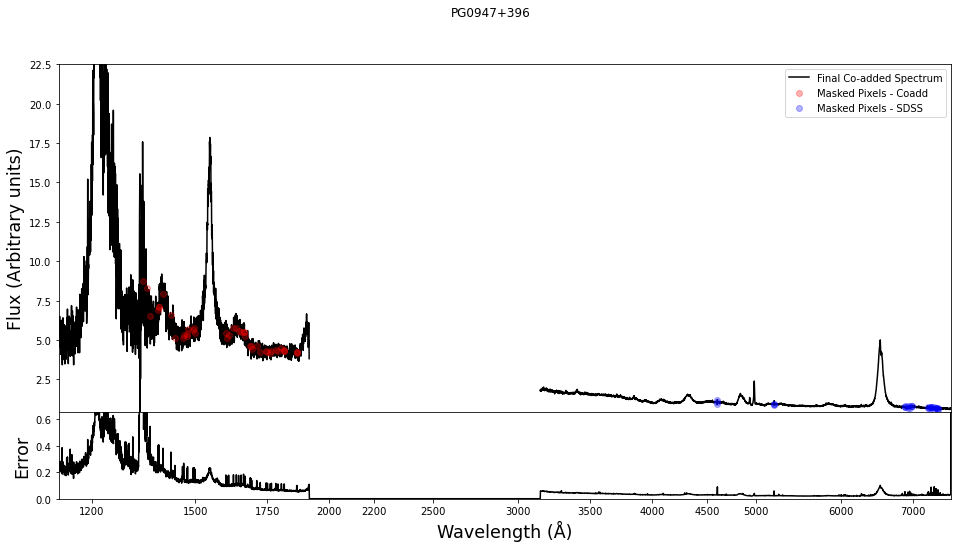

Good: PG0947+396


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/LowerResHSTRebin_TVM.py:102: RuntimeWarning: invalid value encountered in sqrt
  fluxerr_HST_rebin[i] = (m_err*wave_HST_rebin[i] + b_err) * np.sqrt(old_width/new_width)
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 26.310656


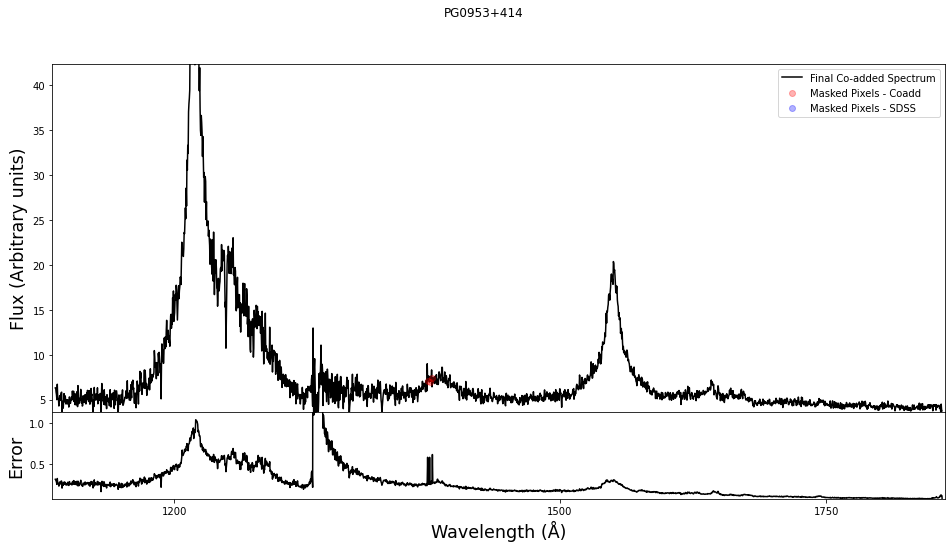

Good: PG0953+414


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 10.678026


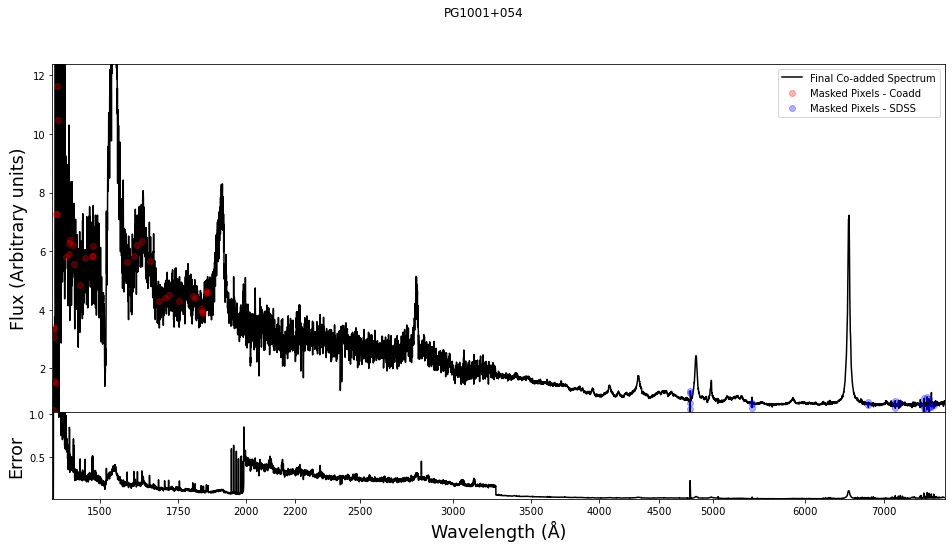

Good: PG1001+054


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 37.148905


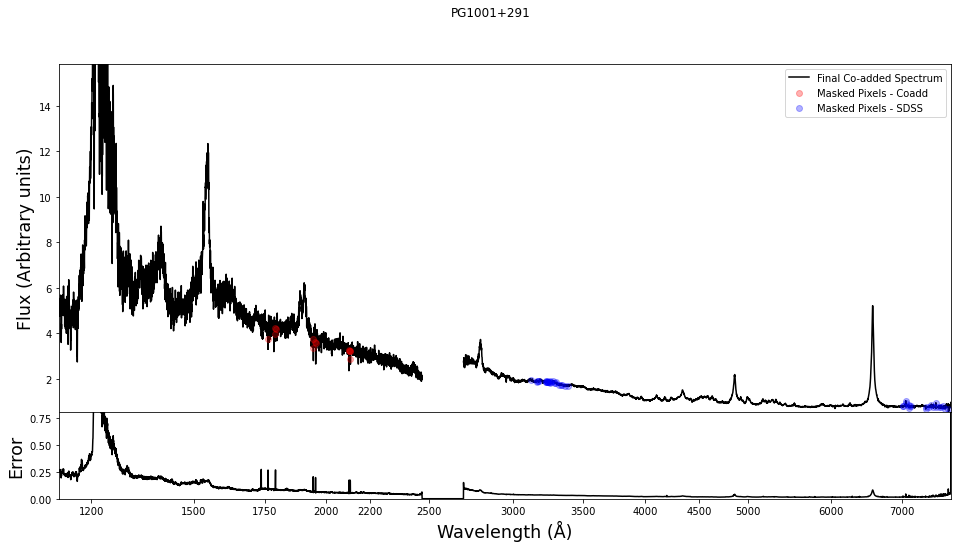

Good: PG1001+291


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 24.471363


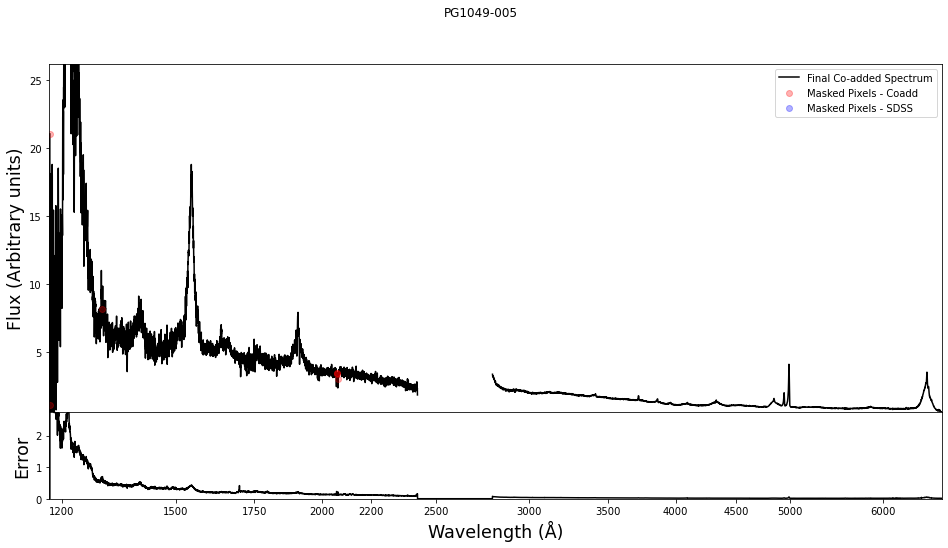

Good: PG1049-005


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 36.702422


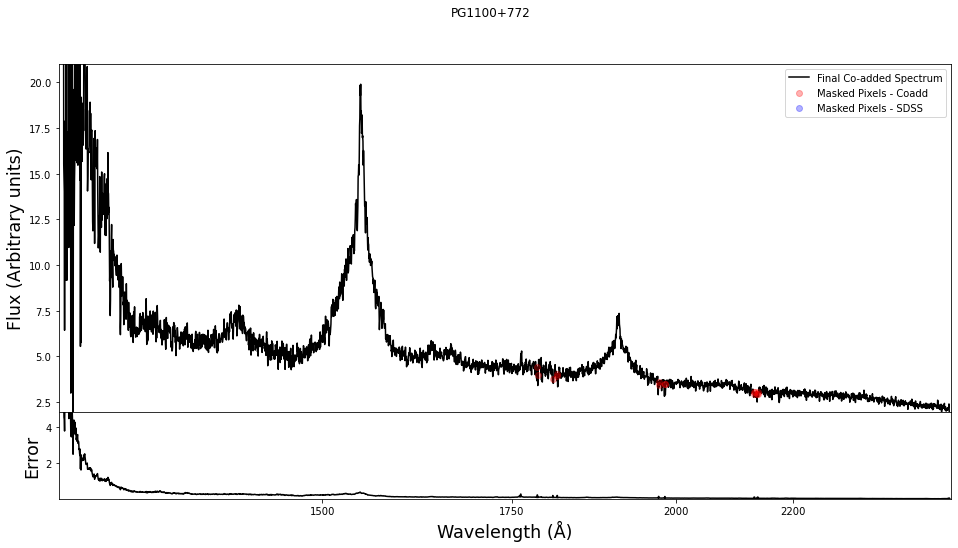

Good: PG1100+772


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 53.342584


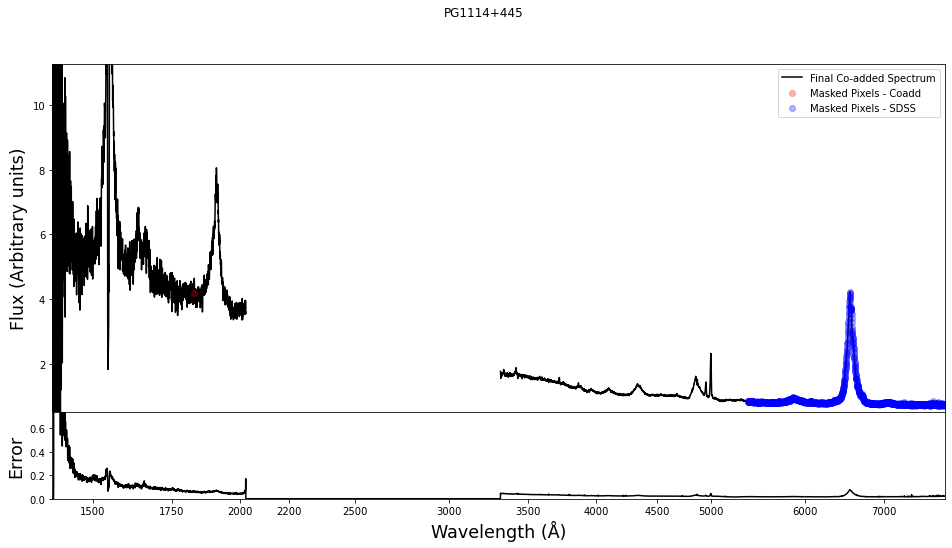

Good: PG1114+445


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 26.401406


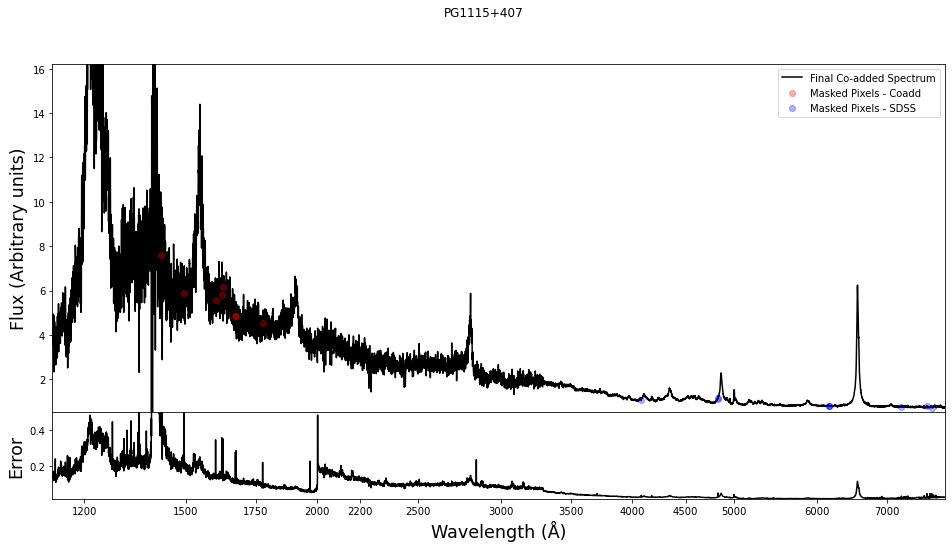

Good: PG1115+407


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 76.827358


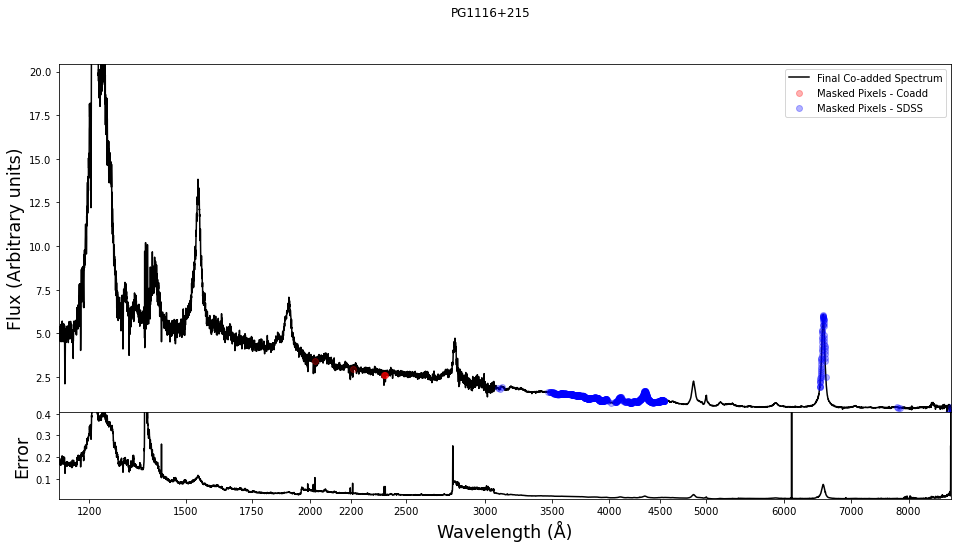

Good: PG1116+215
Median wavelength resolution: 69.09 km/s
SNR is 17.241483


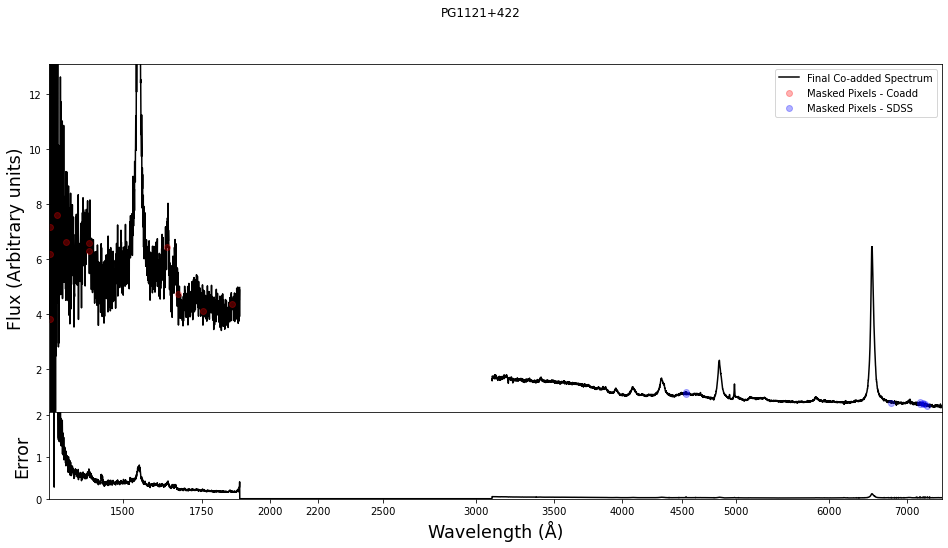

Good: PG1121+422


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 73.736875


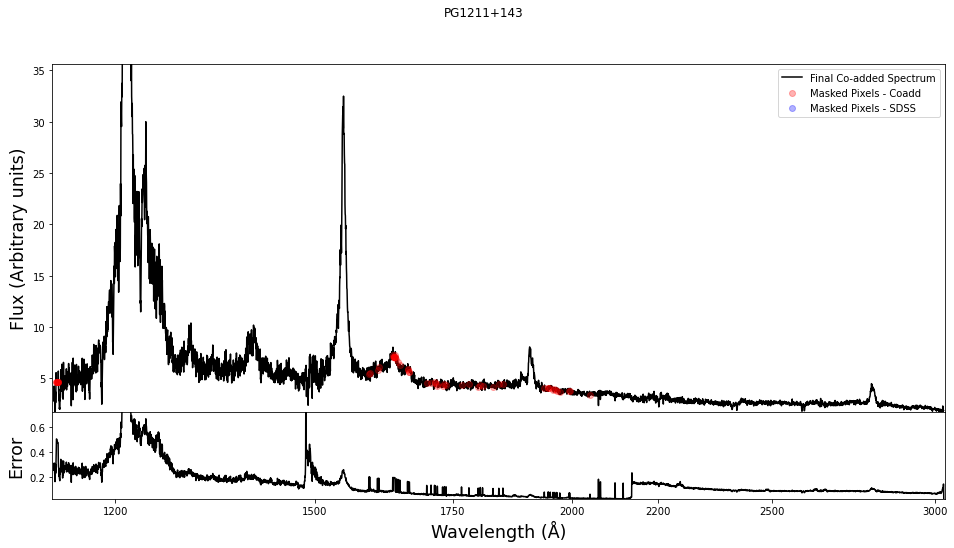

Good: PG1211+143


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 24.707993


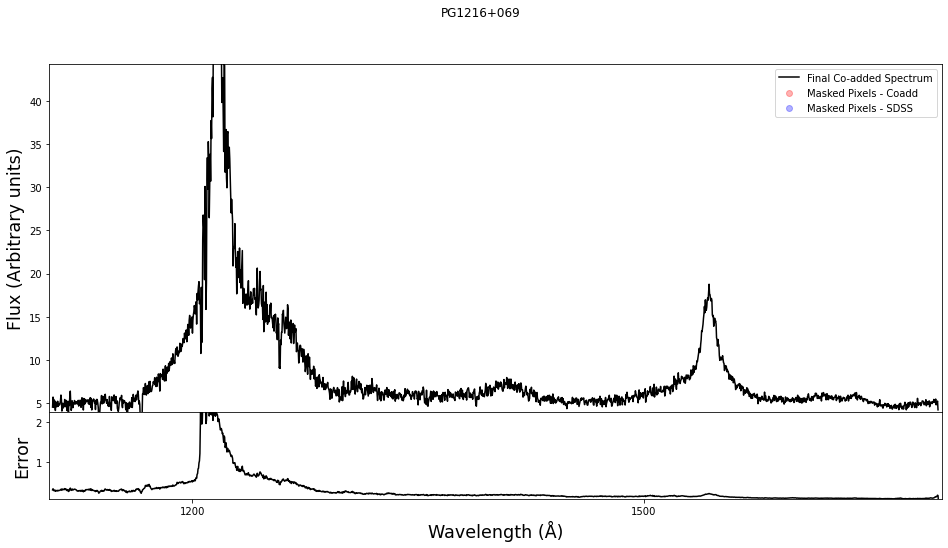

Good: PG1216+069


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 52.086955


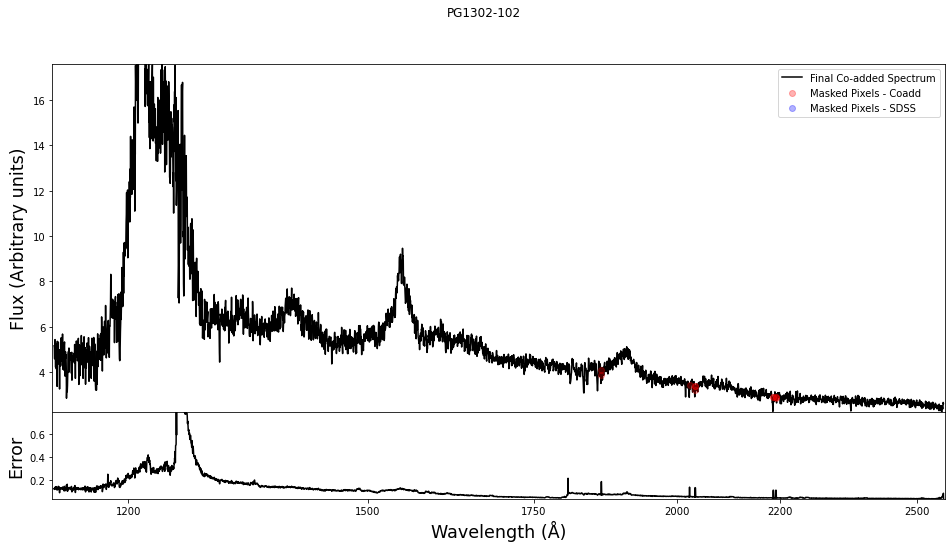

Good: PG1302-102


../../AllHSTCode/Read_FOS_TVM.py:486: RuntimeWarning: divide by zero encountered in true_divide
  new_weights = 1 / (new_errs**2.)


Median wavelength resolution: 69.09 km/s
SNR is 11.543967


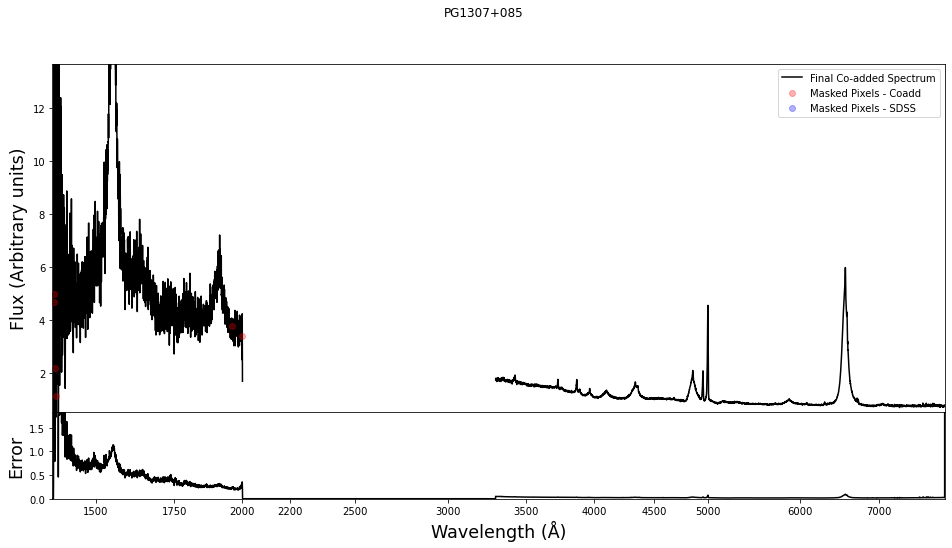

Good: PG1307+085


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 29.473382


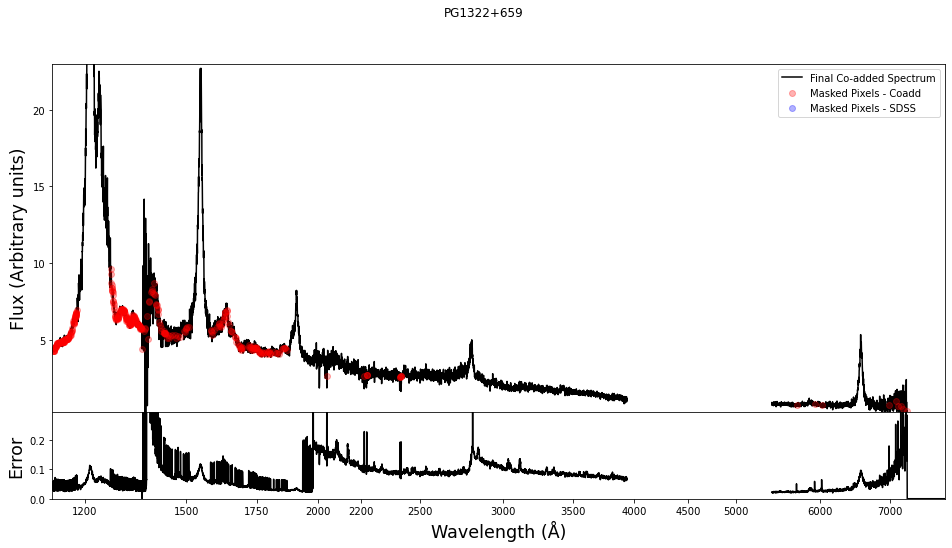

Good: PG1322+659


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 23.953839


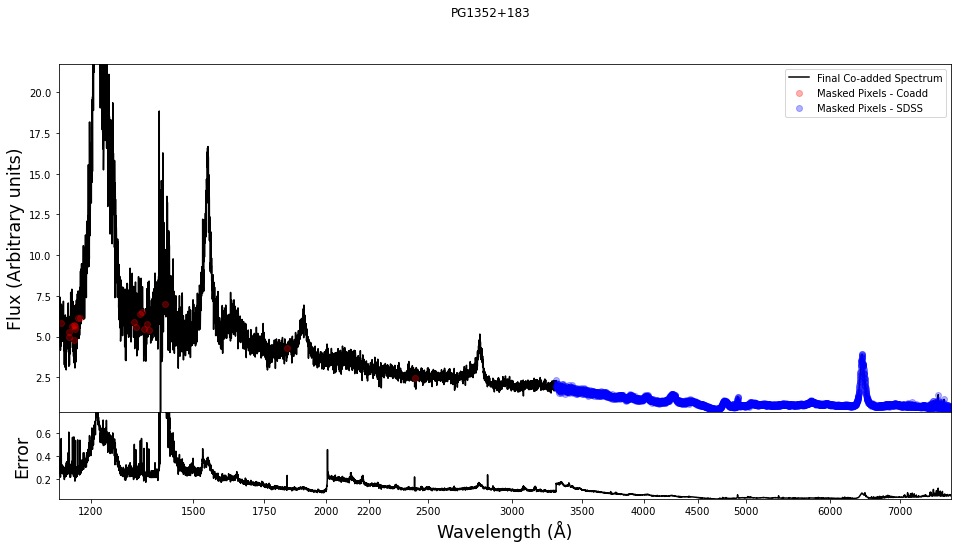

Good: PG1352+183


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 14.940721


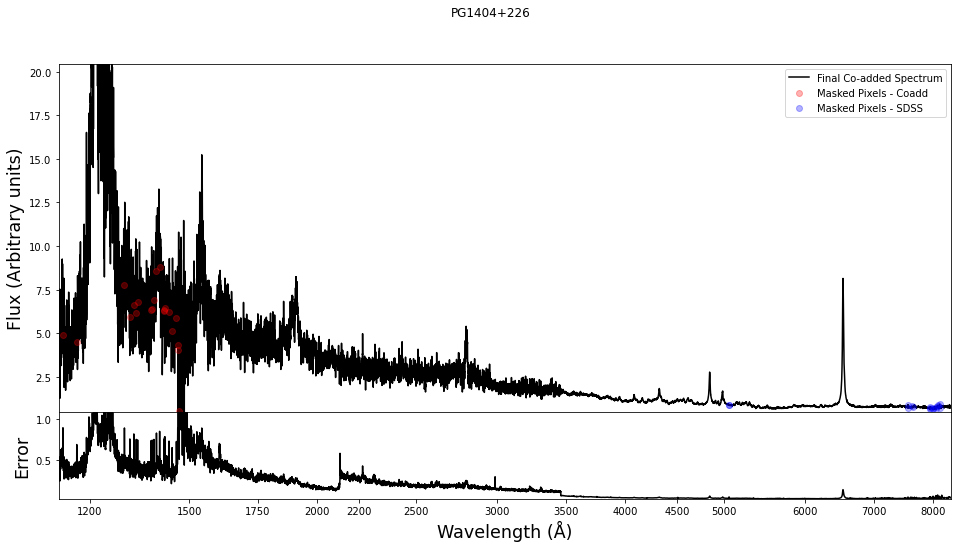

Good: PG1404+226


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 56.269686


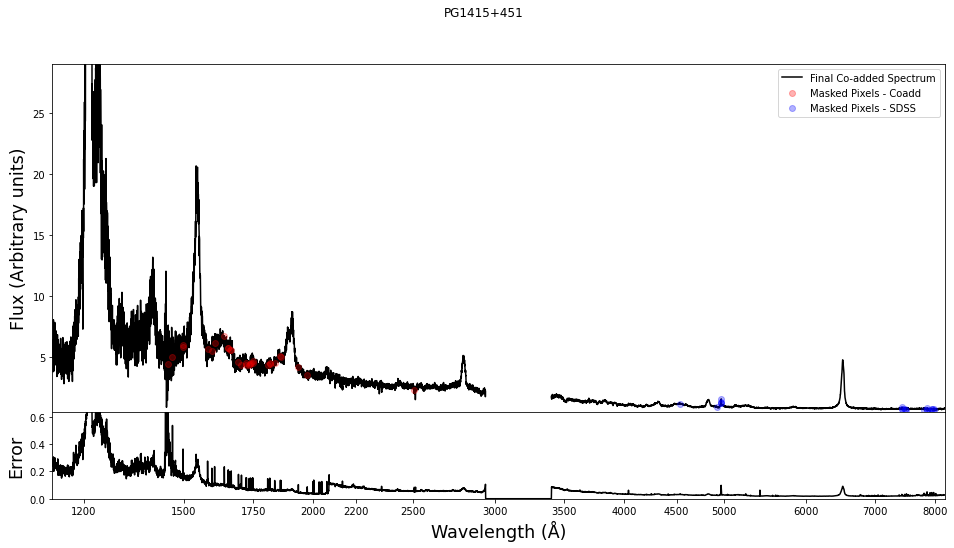

Good: PG1415+451
Median wavelength resolution: 69.09 km/s
Coadd for PG1545+210 is not viable.
SNR is 6.900989


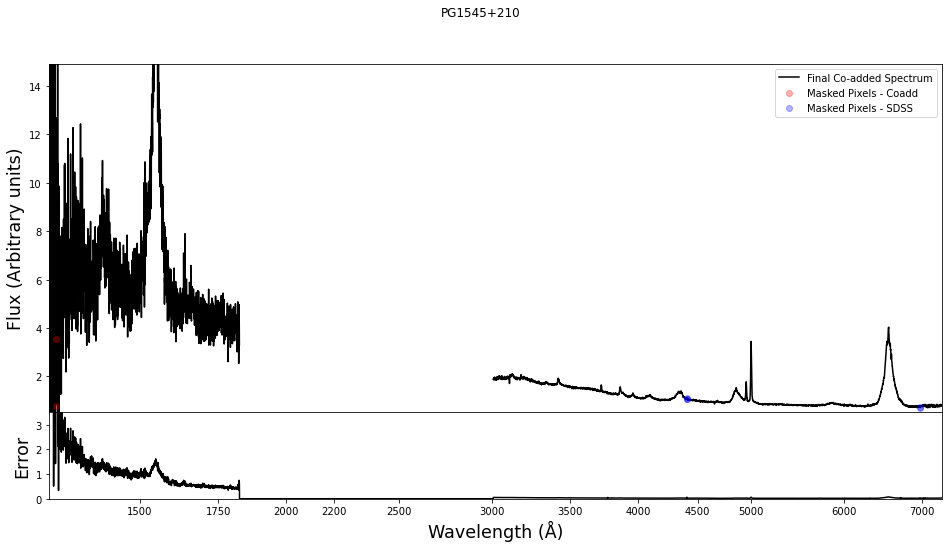

Good: PG1545+210
Median wavelength resolution: 69.09 km/s
SNR is 11.576366


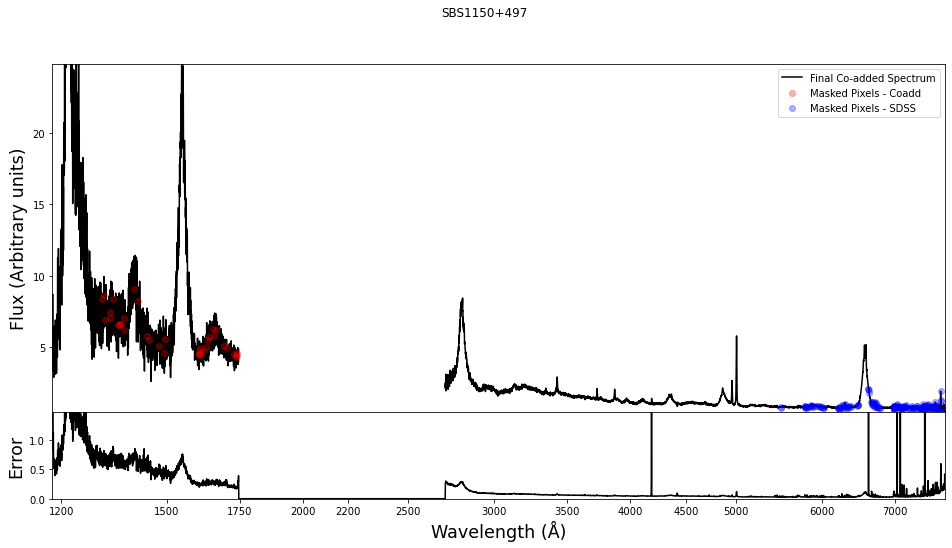

Good: SBS1150+497
Median wavelength resolution: 69.09 km/s
SNR is 19.333415


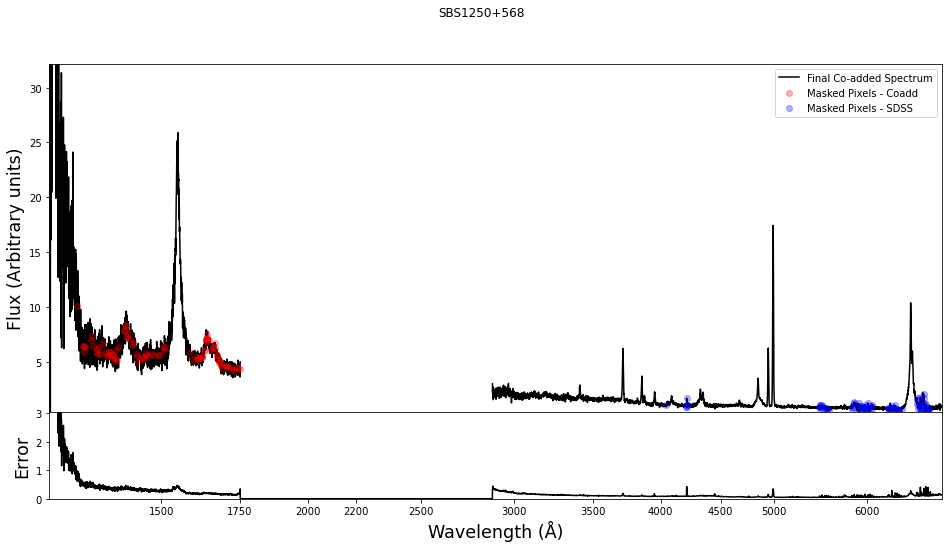

Good: SBS1250+568


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 25.329759


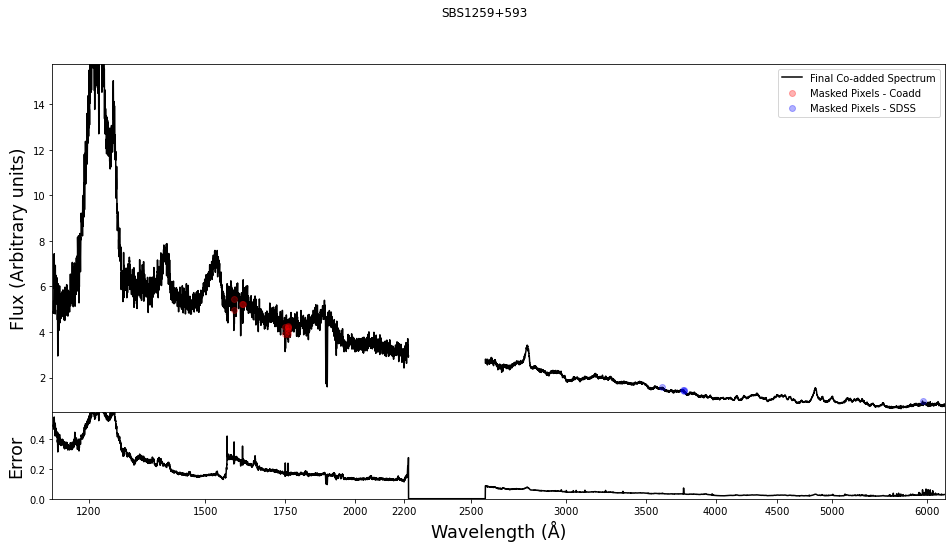

Good: SBS1259+593


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
Coadd for UM355 is not viable.
SNR is 5.828236


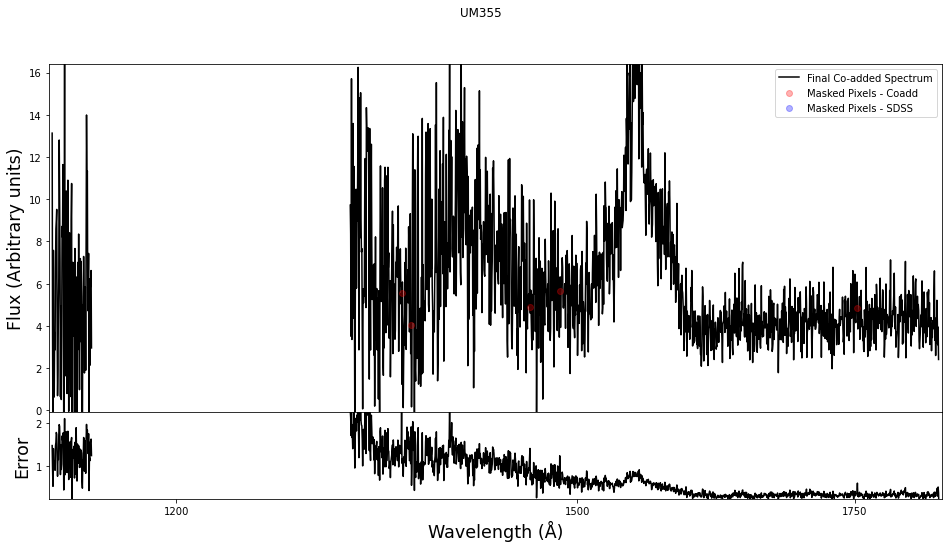

Good: UM355


../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 21.839880


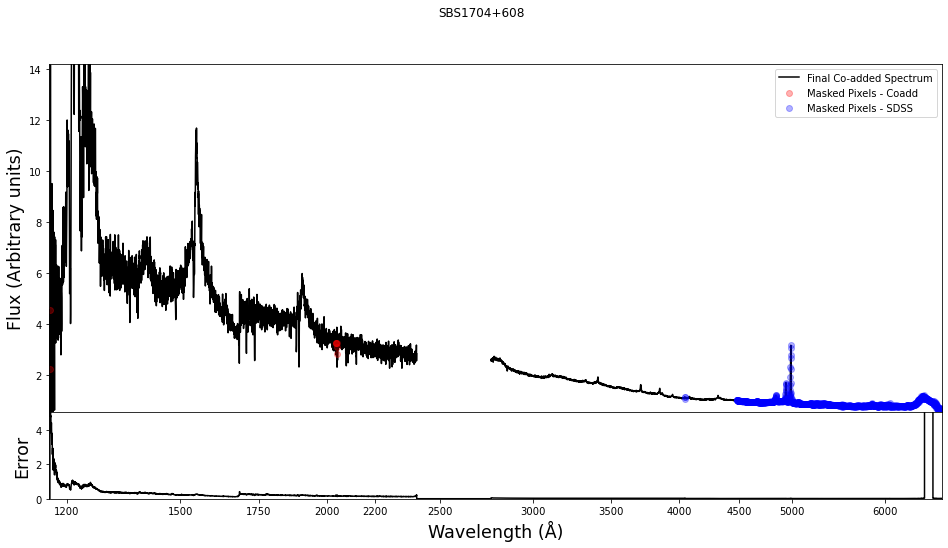

Good: SBS1704+608


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 109.466580


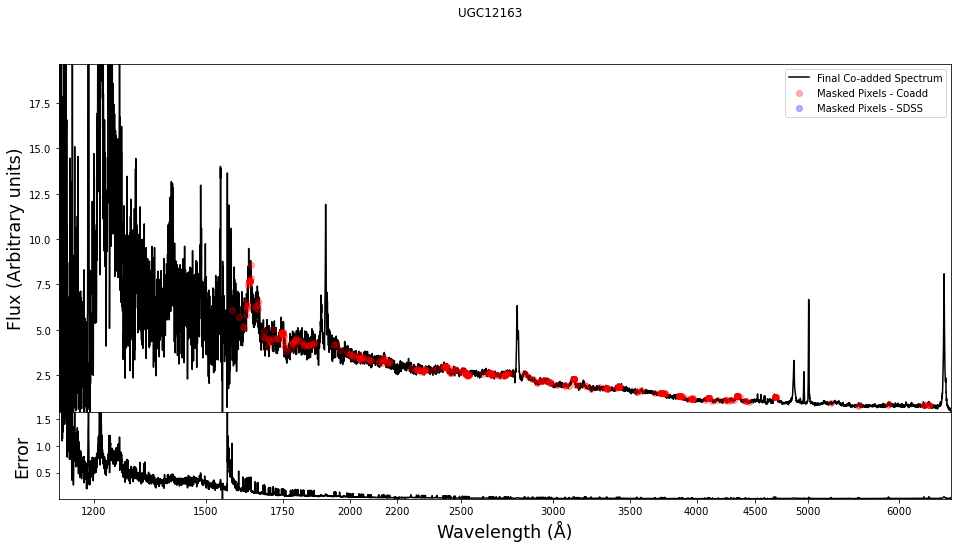

Good: UGC12163


In [12]:
#%%capture
for i in range(sul[FOS].shape[0]):
    if sdss[FOS][i]: fn_sdss = "%04d/spec-%04d-%05d-%04d.fits"%(plate[FOS][i],plate[FOS][i],mjd[FOS][i],fiber[FOS][i])
    else: fn_sdss = None
    #try:
    Read_FOS_TVM.rebin(id_fos[FOS][i], fn_sdss, z[FOS][i])
    print("Good: %s" % id_fos[FOS][i])
    """
    except IndexError:
        print("Index Error: %s" % id_fos[FOS][i])
        #except ValueError:
        #    print("%s doesn't work"%id_fos[FOS][i])
    except ValueError:
        print("Value Error: %s" % id_fos[FOS][i])
    """

In [13]:
np.isnan((sul.iloc[id_fos=="J06357-7516"])["SDSS_NAME"].values[0])

True

In [14]:
ID = sul.iloc[id_fos=="J06357-7516"]
ID

IAU Instrument     FOS_Name STIS_Name COS_Name HST_Opt Inst_final  \
44  J06357-7516        FOS  J06357-7516      None     None     NaN        FOS   

   S2N_coadd      z  Hbeta  ...       _RA        _DE  SDSS Spectra  SDSS_NAME  \
44        20  0.651   7922  ...  98.94381 -75.271317           yes        NaN   

    RA  DEC  PLATE  MJD  FIBERID  Separation  
44 NaN  NaN    NaN  NaN      NaN         NaN  

[1 rows x 31 columns]

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
../../AllHSTCode/Read_FOS_TVM.py:394: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2. / total_variance[i]) #should be inverse here - otherwise noisier spectra contribute more
../../AllHSTCode/Read_FOS_TVM.py:453: RuntimeWarning: divide by zero encountered in true_divide
  my_weights[:,i] = 1 / (old_binned_errs[:,i]**2 / total_variance[i])


Median wavelength resolution: 69.09 km/s
SNR is 19.954728


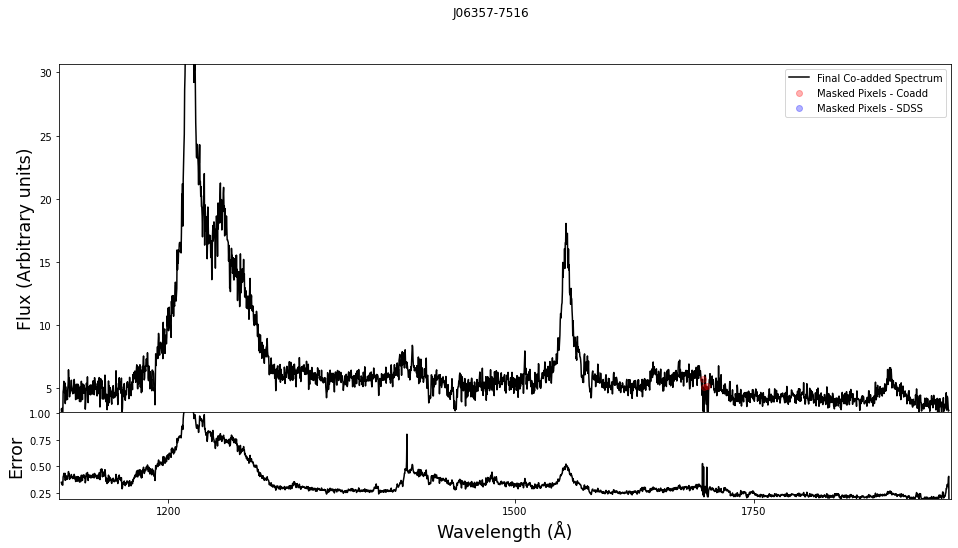

Good: J06357-7516


In [15]:
ID = sul.iloc[id_fos=="J06357-7516"]
fn_sdss = None if np.isnan(ID["SDSS_NAME"].values[0]) else ID["SDSS_NAME"].values[0]

try:
    Read_FOS_TVM.rebin(ID["FOS_Name"].values[0], fn_sdss, ID["z"].values[0])
    print("Good: %s" % ID["FOS_Name"].values[0])
except IndexError:
    print("Index Error: %s" % ID["FOS_Name"].values[0])
    #except ValueError:
    #    print("%s doesn't work"%ID["FOS_Name"].values[0])
except ValueError:
    print("Index Error: %s" % ID["FOS_Name"].values[0])

Fixed by removing single G160L observation that was shorter than the rest anyway.  Mask array length was different from error array length when loading in data for some reason?

----

In [16]:
np.vstack?